<a id='nachalo'></a>

<div style="border-radius: 40px; box-shadow: 4px 4px 4px; border: solid blue 4px; padding: 4px">


<h2 align="right"> проект для телеком провайдера </h2>

<font color='crimson'>

<h1 align="center"> Разработка методики автоматического определения неэффективных операторов колл-центров </h1>
<h2></h2>
</font>

Ссылка на презентацию: https://github.com/AbzalovAR/TELECOM_project/blob/master/Telecom_project_resume.pdf

Ссылка на дашборд: https://public.tableau.com/app/profile/artur6529/viz/Telecom_1_16964128666420/Dashboard1

<a id='0'></a>
<font color='crimson'>  
<h2 align="center"> Описание проекта</h2>
</font>

Заказчик - Телеком провайдер, клиентами которого являются колл-центры. 
Заказик хочет внедрить новую услугу - автоматическое определение неэффективных сотрудников - операторов колл-центров.
Совместно с заказчиком мы пришли к соглашению о том, что признаками низкой эффективности операторов будем считать следующие:
* много пропущенных входящих вызовов,
* долгое ожидание ответа при входящих внешних вызовах,
* мало исходящих вывозов (в случае тех колл-центров, которые специализируются на обзвонах, а не обработке входящих звонков).

Итак, **задача:**
>**разработать методику, по которой можно будет определять неэффективных
операторов автоматически.** <br>

<a id='0'></a>
<font color='crimson'>
    <h2 align="center"> Содержание</h2>
</font>

0. [Описание проекта](#1)<br>
1. [Содержание](#0)<br>
2. [Обзор данных](#2)<br>
3. [Подготовка данных](#3)<br>
    3.1. [Объединим датафреймы](#3-1)<br>
    3.2. [Удалим дубликаты](#3-2)<br>
    3.3. [Обработаем пропуски](#3-3)<br>
    &ensp; 3.3.1. [пропуски в столбце `operator_id`](#3-3-1)<br>
    &ensp; 3.3.2. [пропуски в столбце `internal`](#3-3-2)<br>
    &ensp; 3.3.3. [приведем в соответствие данные столбца `is_missed_call`](#3-3-3)<br>
    3.4. [Преобразуем типы данных](#3-4)<br>
    3.5. [Найдем и уберем отклонения(выбросы)](#3-5)<br>
    3.6. [Проверим категориальные столбцы](#3-6)<br>
    3.7. [Добавим дополнительный столбец](#3-7)<br>
    3.8. [Отобразим корреляцию](#3-8)<br>
    3.9. [Создадим дополнительные столбцы](#3-9)<br>

4. [Исследоваиельский анализ](#4)<br>
    4.1. [Разделим колл-центры по специализации](#4-1)<br>
    4.2. [Проверим связь специализации с тарифным планом](#4-2)<br>
    4.3. [Оперелим границы эффективности операторов в колл-центрах,<br>
которые **специализируются на обработке входящих звонков**](#4-3)<br>
    &ensp; 4.3.1. [по пропущенным внешним вызовам](#4-3-1)<br>
    &ensp; 4.3.2. [по длительности ожидания ответа](#4-3-2)<br>
    &ensp; 4.3.3. [по длительности самого ответа](#4-3-3)<br>
    4.4. [Опереление границ эффективности операторов в колл-центрах,<br>
которые **специализируются на обзвонах**](#4-4)<br>
    &ensp; 4.4.1. [по количеству исходящих внешних звонков](#4-4-1)<br>
    &ensp; 4.4.2. [по продолжительности самого звонка](#4-4-2)<br>

5. [Определим неэффективных операторов](#5)<br>
    5.1. [Определим неэффективных операторов в колл-центрах, которые **специализируются на обработке входящих звонков**](#5-1)<br>
    &ensp; 5.1.1. [по пропущенным внешним вызовам](#5-1-1)<br>
    &ensp; 5.1.2. [по длительности ожидания ответа](#5-1-2)<br>
    &ensp; 5.1.3. [по длительности ответа](#5-1-3)<br>
    5.2. [Определим неэффективных операторов в колл-центрах, которые **специализируются на обзвонах**](#5-2)<br>
    &ensp; 5.2.1. [по количеству исходящих внешних звонков](#5-2-1)<br>
    &ensp; 5.2.2. [по продолжительности звонка](#5-2-2)<br>
 
6. [Проверим гипотезы](#5)<br>
    6.1. [Эффективность работы оперторов в выходные дни и в будни отличается](#6-1)<br>
    6.2. [В выходные дни и в будни относительное количество пропущенных звонков одинаковое](#6-2)<br>
    
7. [Выводы](#itog)

<a id='2'></a>
<font color='crimson'>
<h2 align="center"> Обзор данных</h2>
</font>

Импортируем необходимые библиотеки

In [1]:
# importing libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime, timedelta,date
import scipy

Загрузим датасеты:

In [2]:
# uploading the first dataset
# указал параметр parse_dates, чтобы сразу при выгрузке преобразовать нужный столбец в тип datetime64
# так же передал атрибуту infer_datetime_format значение True (по умолчанию False) - чтобы улучшить синтаксический анализ даты
try:
    telecom_dataset = pd.read_csv('telecom_dataset.csv', parse_dates=['date'],infer_datetime_format=True) 
except:
    telecom_dataset = pd.read_csv('https://github.com/AbzalovAR/TELECOM_project/blob/master/telecom_dataset.csv', parse_dates=['date'],infer_datetime_format=True)

In [3]:
# loading the second dataset   
try:
    telecom_clients = pd.read_csv('telecom_clients.csv', parse_dates=['date_start'],infer_datetime_format=True)
except:
    telecom_clients = pd.read_csv('https://github.com/AbzalovAR/TELECOM_project/blob/master/telecom_clients.csv', parse_dates=['date_start'],infer_datetime_format=True)    

Напишем функцию для разведывательного анализа датафреймов

In [4]:
# this is a function for primary data review
def analiz_nachalo(data):
    """
        Для удобства я написал универсальную функцию для первичного обзора данных, 
        которая помогает наиболее полно увидеть многие параметры датафрейма и,
        возможно, сразу заметить какие либо закономерности.
    
    """    
    print('\b'+'\033[1m'+'\033[91m'+' Датафрейм содержит \n столбцов ', data.shape[1], 
          ' шт. и строк ', data.shape[0], ' шт.'+'\033[0m \n') # shape выводит кол-во строк и столбцов

    print('\b'+'\033[1m'+'\033[91m'+' Первые 5 строк:'+'\033[0m')
    pd.set_option('display.max_columns', None) # эта функция библиотеки pandas чтобы отобразить все столбцы
    display(data.head()) # отображение первых строк
    
    print('\033[1m'+'\033[91m'+' Последние 5 строк:'+'\033[0m')
    display(data.tail()) # отображение последних строк
    
    
    print('\n\b'+'\033[1m'+'\033[91m'+' Выведем общую информацию о датафрейме:'+'\033[0m \n')        
    data.info(show_counts=True) # добавил условие (show_counts=True) для отображения количества ненулевых значений в каждом столбце
    
    # запускаю цикл, который выявит и отобразит только те столбцы где имеются пропуски:
    n = 0
    for i in data.columns:
        n += data[i].isna().sum() 
    if n > 0:
        print('\n\b'+'\033[1m'+'\033[91m'+' Как видим в датафрейме имеются пропуски в следующих столбцах:'+'\033[0m')
        for i in data:
            if data[i].isna().sum() > 0:
                print('    в столбце '+'\033[94m'+f'{i}'+'\033[0m'+' = ', data[i].isna().sum(), 'шт.'+'\033[0m')
        print('    в остальных столбцах пропусков нет')
        print ('\033[1m'+'\033[91m'+'\n Дополнительно отобразим пропуски визуально:'+'\033[0m')
        # здесь используем библиотеки seaborn и pyplot(из matplotlib):
        plt.figure(figsize=(15,10))
        sns.heatmap(data.isna(), yticklabels=False, cbar=False, cmap="YlGnBu")
        plt.show()
    else: print('\n\b'+'\033[1m'+'\033[91m'+' Пропусков в данных нет - прекрасно!'+'\033[0m')

    # пока просто отображаю явные дубликаты, решение об их удалении приму в предобработке
    print('\n\b'+'\033[1m'+'\033[91m'+' Количество явных дубликатов:'+'\033[0m', data.duplicated().sum())
    
    print(' \n\b'+'\033[1m'+'\033[91m'+' Выведем информацию о числовых столбцах\n (показатели описательной статистики):'+'\033[0m')
    display(data.describe()) #  вычисление показателей описательной статистики

    # теперь пробуем отобразить информацию о числовых столбцах графически и, 
        # если графики построить не получиться, выведем сообщение об этом  
    try:
        print('\b'+'\033[1m'+'\033[91m'+' Построим гистограммы для всех числовых столбцов датасета:'+'\033[0m')          
        data.hist(figsize=(15,10), bins=20); 
        plt.suptitle('Гистограммы распределения признаков')
        plt.show()
    except: print('    гистограммы для чиловых столбцов отобразить не получилось,\n возможно числовых столбцов нет или в них имеются не числовые значения')
            
    
    print('\n\b'+'\033[1m'+'\033[91m'+' Проверим категориальные столбцы:\n'+
          '(за категориальные столбцы программа принимает столбцы, \n'+
          'в которых уникальных значений меньше "50" - это условие можно изменить) \033[0m')
    """
        Я пока не нашел универсального и точного метода определения категориальных столбцов,
        по этому использую способ с количеством значений.
        
    """    
    for i in data:
        if data[i].nunique() < 50: # Если уникальных значений столбца больше условно 50 - будем считать его числовым, 
                                # в редких случаях в категорияальных столбцах больше 50 значений
            print('    Уникальные значения столбца'+'\033[94m'+f' {i}:'+'\033[0m'+'')
            print(data[i].sort_values().unique())
            print('    Распределение уникальных значений:')
            df = data[i].value_counts(normalize=True).reset_index()
            df = df.rename(columns={'index':i, i:'доля_значений'})
            df['доля_значений'] = round(df['доля_значений'],2)
            
            # Функция для отображения графика и таблицы рядом на одном уровне
            fig = plt.figure(figsize=(20,5))
            ax1 = fig.add_subplot(121)
            sns.barplot(data=df, x=i, y="доля_значений", ax=ax1)
            ax1.tick_params(axis='x', labelrotation = -75)
            ax1.set(title=(f'График распределения уникальных значений столбца {i}'))
            ax2 = fig.add_subplot(122)
            font_size=14
            bbox=[0, 0, 1, 1]
            ax2.axis('off')
            mpl_table = ax2.table(cellText = df.values, rowLabels = df.index, bbox=bbox, colLabels=df.columns)
            mpl_table.auto_set_font_size(False)
            mpl_table.set_fontsize(font_size)
            plt.title(f'Распределение уникальных значений столбца {i}')
            plt.xlabel(i)
            plt.ylabel('доли значений')
            plt.show()
            
    print('\n \033[94m \033[01m'+'*'*99)    

#### Посмотрим первый датафрейм

**Датасет `telecom_dataset`:**<br>
`user_id` — идентификатор клиента;<br>
`date` — дата статистики;<br>
`direction` — направление вызовов: `out` — исходящий вызов, `in` — входящий;<br>
`internal` — маркер внутренних (**True**) и внешних (**False**) вызовов;<br>
`operator_id` — идентификатор оператора;<br>
`is_missed_call` — маркер пропущенных вызовов;<br>
`calls_count` — количество звонков;<br>
`call_duration` — длительность звонка без учёта времени ожидания (**в секундах**);<br>
`total_call_duration` — длительность звонка с учётом времени ожидания (**в секундах**).<br>

 Датафрейм содержит 
 столбцов  9  шт. и строк  53902  шт. 

 Первые 5 строк:


,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-04 00:00:00+03:00,in,False,NaN,True,2,0,4
1,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5
2,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1
3,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,False,1,10,18
4,166377,2019-08-05 00:00:00+03:00,out,False,880022.0,True,3,0,25


 Последние 5 строк:


,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
53897,168606,2019-11-10 00:00:00+03:00,out,True,957922.0,True,1,0,38
53898,168606,2019-11-11 00:00:00+03:00,out,True,957922.0,False,2,479,501
53899,168606,2019-11-15 00:00:00+03:00,out,True,957922.0,False,4,3130,3190
53900,168606,2019-11-15 00:00:00+03:00,out,True,957922.0,False,4,3130,3190
53901,168606,2019-11-19 00:00:00+03:00,in,False,NaN,True,2,0,64



 Выведем общую информацию о датафрейме: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype                                
---  ------               --------------  -----                                
 0   user_id              53902 non-null  int64                                
 1   date                 53902 non-null  datetime64[ns, pytz.FixedOffset(180)]
 2   direction            53902 non-null  object                               
 3   internal             53785 non-null  object                               
 4   operator_id          45730 non-null  float64                              
 5   is_missed_call       53902 non-null  bool                                 
 6   calls_count          53902 non-null  int64                                
 7   call_duration        53902 non-null  int64                                
 8   total_call_duration  53902 non-null  int64 

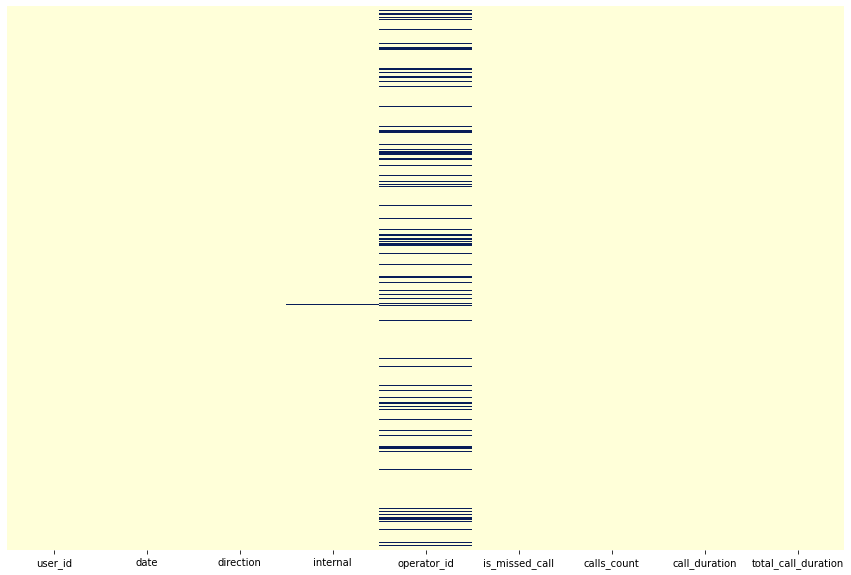


 Количество явных дубликатов: 4900
 
 Выведем информацию о числовых столбцах
 (показатели описательной статистики):


,user_id,operator_id,calls_count,call_duration,total_call_duration
count,53902.000000,45730.000000,53902.000000,53902.000000,53902.000000
mean,167295.344477,916535.993002,16.451245,866.684427,1157.133297
std,598.883775,21254.123136,62.917170,3731.791202,4403.468763
min,166377.000000,879896.000000,1.000000,0.000000,0.000000
25%,166782.000000,900788.000000,1.000000,0.000000,47.000000
50%,167162.000000,913938.000000,4.000000,38.000000,210.000000
75%,167819.000000,937708.000000,12.000000,572.000000,902.000000
max,168606.000000,973286.000000,4817.000000,144395.000000,166155.000000


 Построим гистограммы для всех числовых столбцов датасета:


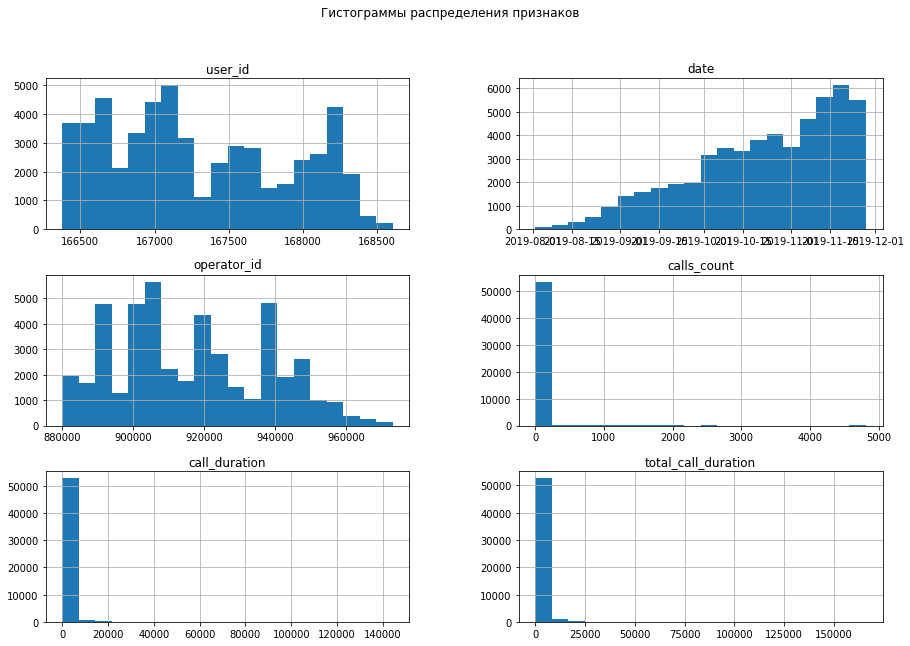


 Проверим категориальные столбцы:
(за категориальные столбцы программа принимает столбцы, 
в которых уникальных значений меньше "50" - это условие можно изменить) 
    Уникальные значения столбца direction:
['in' 'out']
    Распределение уникальных значений:


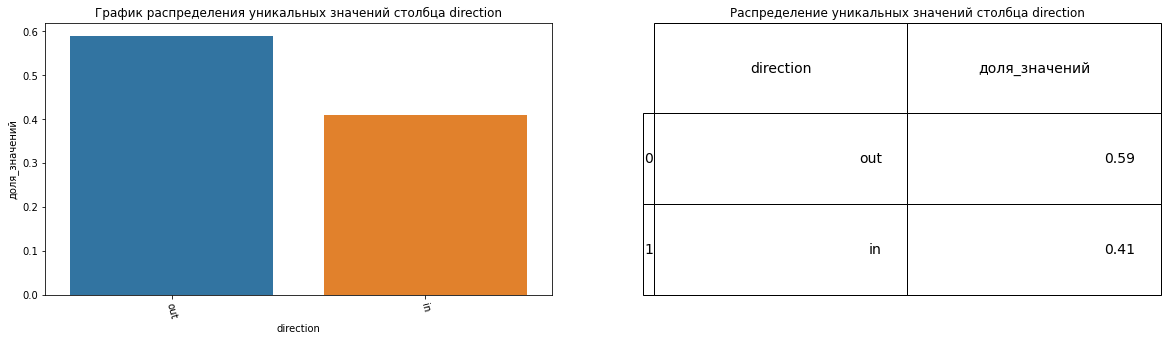

    Уникальные значения столбца internal:
[False True nan]
    Распределение уникальных значений:


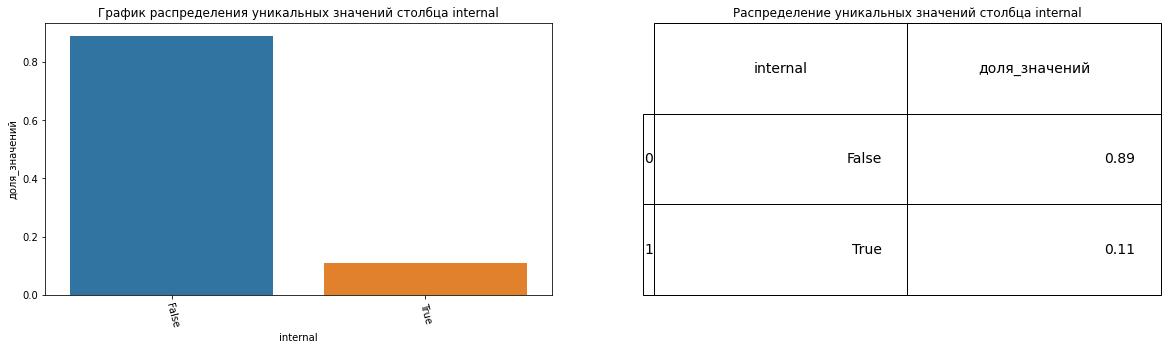

    Уникальные значения столбца is_missed_call:
[False  True]
    Распределение уникальных значений:


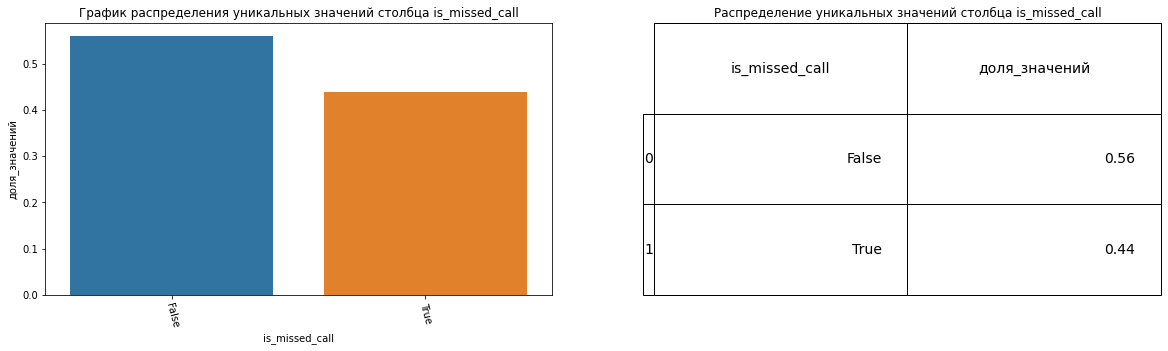


  ***************************************************************************************************


In [5]:
analiz_nachalo(telecom_dataset)

<div style="border-radius: 22px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 16px">


**Выводы**
* датасет содержит 9 столбцов и 53902 записи о звонках,
* стиль названий столбцов корректен,
* имеются явные дубликаты - удалим,
* треюуется исправить типы столбцов:<br>
 тип столбца `date` переделаем на datetime,<br>
 тип столбца `internal` переделаем в bool,<br>
 тип столбца `operator_id` - привести к типу int,
* требуется обработать пропуски в столбцах `operator_id` и `internal`.

#### Посмотрим второй датафрейм

**Датасет `telecom_clients`:**<br>
`user_id` — идентификатор клиента;<br>
`tariff_plan` — тарифный план клиента;<br>
`date_start` — дата регистрации клиента в сервисе.<br>

 Датафрейм содержит 
 столбцов  3  шт. и строк  732  шт. 

 Первые 5 строк:


,user_id,tariff_plan,date_start
0,166713,A,2019-08-15
1,166901,A,2019-08-23
2,168527,A,2019-10-29
3,167097,A,2019-09-01
4,168193,A,2019-10-16


 Последние 5 строк:


,user_id,tariff_plan,date_start
727,166554,B,2019-08-08
728,166911,B,2019-08-23
729,167012,B,2019-08-28
730,166867,B,2019-08-22
731,166565,B,2019-08-08



 Выведем общую информацию о датафрейме: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   user_id      732 non-null    int64         
 1   tariff_plan  732 non-null    object        
 2   date_start   732 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 17.3+ KB

 Пропусков в данных нет - прекрасно!

 Количество явных дубликатов: 0
 
 Выведем информацию о числовых столбцах
 (показатели описательной статистики):


,user_id
count,732.000000
mean,167431.927596
std,633.810383
min,166373.000000
25%,166900.750000
50%,167432.000000
75%,167973.000000
max,168606.000000


 Построим гистограммы для всех числовых столбцов датасета:


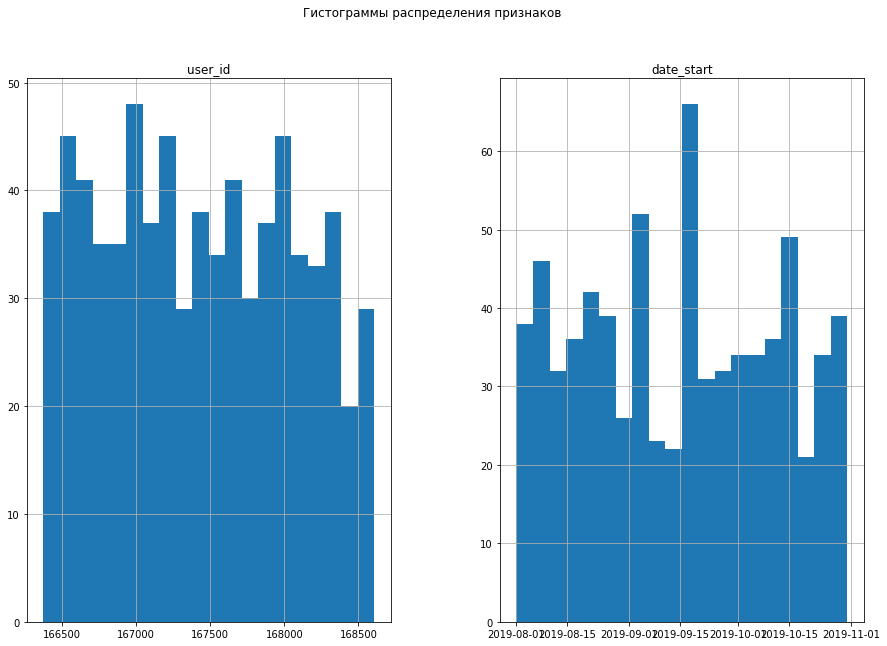


 Проверим категориальные столбцы:
(за категориальные столбцы программа принимает столбцы, 
в которых уникальных значений меньше "50" - это условие можно изменить) 
    Уникальные значения столбца tariff_plan:
['A' 'B' 'C']
    Распределение уникальных значений:


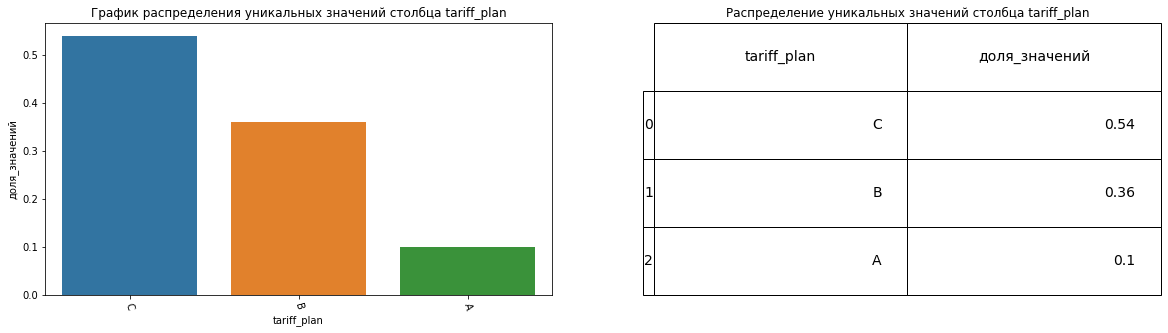


  ***************************************************************************************************


In [6]:
analiz_nachalo(telecom_clients)

Псомотрим у всех ли датасетов период данных совпадает

In [7]:
def time_min_max(data):
    print('столбец', data.name)
    print('минимальное время', data.min())
    print('максимальное время', data.max())
    print();

In [8]:
time_min_max(telecom_dataset['date'])
time_min_max(telecom_clients['date_start'])

столбец date
минимальное время 2019-08-02 00:00:00+03:00
максимальное время 2019-11-28 00:00:00+03:00

столбец date_start
минимальное время 2019-08-01 00:00:00
максимальное время 2019-10-31 00:00:00



Период времени не совпадает. <br>Скорее всего потому, что в столбце `date_start` дата регистрации клиента, а в столбце `date` - даты взаимодействия с клиентом.

In [9]:
print('Уникальных клиентов в telecom_dataset: ', telecom_dataset['user_id'].nunique())
print('Уникальных клиентов в telecom_clients: ', telecom_clients['user_id'].nunique())

Уникальных клиентов в telecom_dataset:  307
Уникальных клиентов в telecom_clients:  732


Из 732 клиентов улугами телеком провайдера воспользовались только 307.

<div style="border-radius: 22px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 16px">


**Выводы:**
* названия столбцов корректны,
* тип столбца `date_start` привести к datetime,
* пропусков нет,
* дубликатов нет, 
* периоды времени адекватны,
* из 732 зарегестрированных клиента, взаимодействие происходило только с 307 клиентами.

<a id='3'></a>
<font color='crimson'>

<h2 align="center"> Подготовка данных</h2>
</font>

<a id='3-1'></a>

<font color='crimson'>

### Объединим датафреймы
</font>

[К началу раздела](#3)<br>
[К соддержанию](#0)

Чтобы определить стаж работы операторов, а так же проверить взаимосвязь с тарифными планами нам следует объединить датафреймы:

In [10]:
# combining dataframes
# используем параметр how='left' чтобы оставить все события для всех user_id,
# если какой либо user_id из правой таблицы не войдет в объединенный датафрейм,
# то значит событий(взаимодействия) с ним не было и для анализа они не важны
df = telecom_dataset.merge(telecom_clients, on='user_id', how='left') 
df.head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,tariff_plan,date_start
0,166377,2019-08-04 00:00:00+03:00,in,False,NaN,True,2,0,4,B,2019-08-01
1,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5,B,2019-08-01
2,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1,B,2019-08-01
3,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,False,1,10,18,B,2019-08-01
4,166377,2019-08-05 00:00:00+03:00,out,False,880022.0,True,3,0,25,B,2019-08-01


<div style="border-radius: 22px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 16px">

Датафреймы объединили

<a id='3-2'></a>

<font color='crimson'>

### Удалим дубликаты
</font>

[К началу раздела](#3)<br>
[К соддержанию](#0)

Удалим явные дубликаты:

In [11]:
# removing obvious duplicates
print('\033[1m'+'Явных дубликатов до удаления:'+'\033[22m', df.duplicated().sum())
df = df.drop_duplicates() # удаляем явные дубликаты
print('\033[1m'+'Явных дубликатов после удаления:'+'\033[22m', df.duplicated().sum())

Явных дубликатов до удаления: 4900
Явных дубликатов после удаления: 0


Проверим на неявные дубликаты:
Так как данные в датасете агрегированные, здесь так же не должно быть дубликатов по одинаковым критериям: <br>
**user_id + дата + operator_id + direction + internal + is_missed_call**.

In [12]:
# checking for implicit duplicates
df[['user_id', 'date', 'direction', 'internal', 'operator_id',
       'is_missed_call']].duplicated().sum() # проверяем наличие неявных дубликатов

0

Не явных дубликатов нет.

<div style="border-radius: 22px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 16px">

**Выводы:**<br> 
В датасетах удалены янвые дубликаты.<br> 
Произведена проверка на неявные дубликаты - неявные дубликаты не обнаружены. <br> 

<a id='3-3'></a>

<font color='crimson'>

### Обработаем пропуски
</font>

[К началу раздела](#3)<br>
[К соддержанию](#0)

<a id='3-3-1'></a>

<font color='crimson'>

#### Пропуски в столбце <font color='blue'> operator_id</font>

</font>

Попробуем разобраться в причинах возникновения пропусков в столбце `operator_id`.
Посмотрим на некоторые строки с пропусками:

In [13]:
# looking for the reasons for missing values in the column
df_nan = df.loc[df['operator_id'].isna()] 
df_nan.head(10)

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,tariff_plan,date_start
0,166377,2019-08-04 00:00:00+03:00,in,False,NaN,True,2,0,4,B,2019-08-01
7,166377,2019-08-05 00:00:00+03:00,in,False,NaN,True,6,0,35,B,2019-08-01
9,166377,2019-08-06 00:00:00+03:00,in,False,NaN,True,4,0,62,B,2019-08-01
17,166377,2019-08-07 00:00:00+03:00,in,False,NaN,True,2,0,24,B,2019-08-01
27,166377,2019-08-12 00:00:00+03:00,in,False,NaN,True,2,0,34,B,2019-08-01
30,166377,2019-08-13 00:00:00+03:00,in,False,NaN,True,7,0,128,B,2019-08-01
38,166377,2019-08-14 00:00:00+03:00,in,False,NaN,True,1,0,3,B,2019-08-01
77,166377,2019-08-22 00:00:00+03:00,in,False,NaN,True,1,0,1,B,2019-08-01
81,166377,2019-08-23 00:00:00+03:00,in,False,NaN,True,2,0,47,B,2019-08-01
88,166377,2019-08-24 00:00:00+03:00,in,False,NaN,True,2,0,35,B,2019-08-01


Сразу в глаза бросаются одинаковый алгоритм возникновения NaN - все вызовы входящие, внешние и пропущенные. 
Проверим количество уникальных значений в столбцах `direction`, `internal` и `is_missed_call`:

In [14]:
display('Количество строк относительно уникальных значений в столбце direction:', 
        df_nan.groupby('direction')[['user_id', 'internal', 'is_missed_call']].count())
display('Количество строк относительно уникальных значений в столбце internal:', 
        df_nan.groupby('internal')[['user_id', 'direction', 'is_missed_call']].count())
display('Количество строк относительно уникальных значений в столбце is_missed_call:', 
        df_nan.groupby('is_missed_call')[['user_id', 'direction', 'internal']].count())

'Количество строк относительно уникальных значений в столбце direction:'

,user_id,internal,is_missed_call
direction,,,
in,7270,7217,7270
out,186,184,186


'Количество строк относительно уникальных значений в столбце internal:'

,user_id,direction,is_missed_call
internal,,,
False,7078,7078,7078
True,323,323,323


'Количество строк относительно уникальных значений в столбце is_missed_call:'

,user_id,direction,internal
is_missed_call,,,
False,113,113,113
True,7343,7343,7288


Как видим, основная масса - это пропущенные внешние входящие звонки. 
Будем считать, что эти пропуски возникли из-за того, что программа не успела назначить оператора, либо звонок происходил в нерабочее время. <br>
Но есть не малое колчество других вариаций возникновения пропусков в столбце операторов.

Так как мы исследуем работу операторов, а за пропусками в разных колл-центрах могут скрываться либо один оператор либо десять,<br>
пропуски в столбце `operator_id` являются критическими. 
Так же, чтобы случайно не ошибиться при фильтрации оперпторов с наличием ID и без,<br>
**далее будем анализировать датасет без пропусков**


Создадим копию основного датасета c пропусками операторов, для сохранения исходных данных, 
но продолжим работу с очищенными данными:

In [15]:
# Создадим копию основного датасета, чтобы не потерять данные
data_reserv = df.copy()

In [16]:
# Удалим пропуски в столбце operator_id 
df = df.loc[df['operator_id'].isna() == False]

In [17]:
# Сколько пропусков осталось
display(df[['operator_id','internal']].isna().sum())

operator_id     0
internal       55
dtype: int64

Малая часть звонков имеют категории исходящих, внутренних, отвеченных.<br>
Исходящие без назначения оператора могли возникнуть при внутреннем звонке одного оператора другому (например, с целью консультации). В таком случае все исходящие должны быть внутренними. 
Но проверка этого момента не подтвердила данное предположение. Код:
        
        df.loc[(operator_id_nan['direction'] == 'out') & (df['internal'] == False)& (df['total_call_duration']>10)].head(15)
        
Другое предположение, о том что пропущенные значения в operator_id появлялись из-за, того что программа не успевала назначить оператора, так же не нашла подтверждения. Код:
        
        df.loc[df['operator_id'] < 2, 'avg_wait_time'].max()      
        df.loc[(df['operator_id'] < 2)& (df['avg_wait_time']>50)]        
Получилось слишком много случаев, когда времени было достаточно для нащначения оператора.


Поэтому, **вывод**: природа появления остальных пропусков в столбце `operator_id` точно не ясна, и относительно слишком мала, чтобы уделять разбору причин слишком много времени, поэтому пока заполним заглушками "1", и вернемся при необходимости.
В реальной работе, можно было бы обсудить с менеджментом о возможных причинах возникновения и заполнить пропуски иным способом.

<a id='3-3-2'></a>

<font color='crimson'>

#### Пропуски в столбце <font color='blue'> internal</font>

</font>

Поробуем выяснить причины возникновения пропусков в столбце `internal`. Взглянем на пропуски и униакльные значения:

In [18]:
df.loc[df['internal'].isna()].tail() # Но можно взглянуть и на все строки целиком их осталось 55 - не так уж и много

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,tariff_plan,date_start
46012,168091,2019-11-13 00:00:00+03:00,in,NaN,958460.0,True,1,85,136,B,2019-10-14
50718,168252,2019-11-22 00:00:00+03:00,in,NaN,940658.0,False,1,20,27,A,2019-10-17
51021,168253,2019-11-15 00:00:00+03:00,in,NaN,952948.0,False,2,61,63,A,2019-10-18
51505,168307,2019-11-01 00:00:00+03:00,in,NaN,945046.0,False,1,745,748,B,2019-10-21
53799,168598,2019-11-22 00:00:00+03:00,in,NaN,958394.0,False,1,11,17,C,2019-10-31


Общий алгоритм не прослеживается.

Посмотрим количество уникальных значений

In [19]:
df_nan= df.loc[df['internal'].isna()]
display('Количество строк уникальных значений столбца direction, где пропущены значения в internal: ', 
        df_nan.groupby('direction')[['user_id', 'is_missed_call']].count())
display('Количество строк уникальных значений столбца is_missed_call, где пропущены значения в internal:',
        df_nan.groupby('is_missed_call')[['user_id', 'direction']].count())

'Количество строк уникальных значений столбца direction, где пропущены значения в internal: '

,user_id,is_missed_call
direction,,
in,55,55


'Количество строк уникальных значений столбца is_missed_call, где пропущены значения в internal:'

,user_id,direction
is_missed_call,,
False,54,54
True,1,1


Все звонки входящие. И все, кроме одного не пропущенные. 

Удалим пропуски в столбце `internal`, так как невозможно достоверно определить внешний или внутрений был вызов, а так же потому, что данных пропущенных очень мало относительно всего датасета.

In [20]:
df = df.loc[df['internal'].isna() == False]

<div style="border-radius: 22px; box-shadow: 4px 4px 4px; border: solid red 2px; padding: 16px">

**Более подробный просмотр данных, обнаружил, что есть строки, где общее время звонка больше времени ответа. 
В принципе, наличие времени в столбце "время звонка без учета ожидания", уже говорит говорит о том, что звонок был принят.
Но в столбце `is_missed_call` стоит значение True - якобы он пропущенный.
Это вынуждает выполнить проверку датасета на верность трактования столбца `is_missed_call`:**

<a id='3-3-3'></a>

<font color='crimson'>

#### приведем в соответствие данные столбца <font color='blue'> is_missed_call</font>

</font>

In [21]:
# Находим несоответствие маркеров
df.loc[(df['is_missed_call']==True)&(df['call_duration']>0)].head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,tariff_plan,date_start
1606,166405,2019-11-19 00:00:00+03:00,in,False,939478.0,True,1,165,173,B,2019-08-02
1635,166405,2019-11-21 00:00:00+03:00,in,False,882686.0,True,1,1,5,B,2019-08-02
1657,166405,2019-11-22 00:00:00+03:00,in,False,882686.0,True,1,1,5,B,2019-08-02
2283,166407,2019-09-23 00:00:00+03:00,in,False,888534.0,True,1,133,156,A,2019-08-02
2869,166482,2019-11-05 00:00:00+03:00,in,False,934074.0,True,1,1,15,C,2019-08-05


Строки имеют маркер "пропущеный" и при этом время ответа больше ноля. Это похоже на ошибки программы (какие либо сбои). По этому приведем в соответсвие:

In [22]:
# Будем считать овеченными звонки, которые длились больше 0 секунд
df.loc[(df['is_missed_call']==True)&(df['call_duration']>0), 'is_missed_call'] = False

<div style="border-radius: 22px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 16px">

**Выводы:**
* Пропуски в столбце `operator_id` удалены, так как для анализа эффективности работы оперторов данные об ID операторов имеет критическое значение.      
* Пропуски в столбце `internal` удалили, так как количество пропусков было мало, плюс, я не нашел логических объяснений их происхождения, и, как следствие, не понимаю чем их заполнять.
* По ходу анализа были обнаружены ошибки маркировки отвеченых звонков в столбце `is_missed_call` - строки приведены в соответсвие. <br> В реальной работе информацию об ошибках я бы передал менеджменту или разработчикам.

<a id='3-4'></a>

<font color='crimson'>

### Преобразуем типы данных
</font>

[К началу раздела](#3)<br>
[К соддержанию](#0)

In [23]:
# преобразуем типы данных
df = df.astype({'internal':'bool', 'operator_id':'int'})
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41491 entries, 1 to 53899
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype                                
---  ------               --------------  -----                                
 0   user_id              41491 non-null  int64                                
 1   date                 41491 non-null  datetime64[ns, pytz.FixedOffset(180)]
 2   direction            41491 non-null  object                               
 3   internal             41491 non-null  bool                                 
 4   operator_id          41491 non-null  int32                                
 5   is_missed_call       41491 non-null  bool                                 
 6   calls_count          41491 non-null  int64                                
 7   call_duration        41491 non-null  int64                                
 8   total_call_duration  41491 non-null  int64                                
 9   tariff

<div style="border-radius: 22px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 16px">

**Выводы:**

Преобразовали типы данных в столбцах: 
 * `operator_id` в int 
 * `internal` в bool 

<a id='3-5'></a>

<font color='crimson'>

### Найдем и уберем отклонения(выбросы)
</font>

[К началу раздела](#3)<br>
[К соддержанию](#0)

Еще раз посмортим на показатели столбцов

In [24]:
df.describe()

,user_id,operator_id,calls_count,call_duration,total_call_duration
count,41491.000000,41491.000000,41491.000000,41491.000000,41491.000000
mean,167301.113543,916516.771155,16.921381,1010.940011,1323.153238
std,600.513986,21234.081589,59.786187,4066.666485,4788.953155
min,166377.000000,879896.000000,1.000000,0.000000,0.000000
25%,166782.000000,900790.000000,1.000000,0.000000,67.000000
50%,167175.000000,913938.000000,4.000000,106.000000,289.000000
75%,167827.000000,937708.000000,14.000000,772.000000,1107.000000
max,168606.000000,973286.000000,4817.000000,144395.000000,166155.000000


Бросаются в глаза выбросы в столбце `calls_count`. Но и остальные стоит проверить.

Посмотрим выбросы с учетом межквартильного размаха.

Межквартильный размах (IQR) — это разница между 75-м процентилем (Q3) и 25-м процентилем (Q1) в наборе данных. Он измеряет разброс средних 50% значений.<br>
    
    Выбросы = наблюдения > Q3 + 1,5 IQR или Q1 – 1,5 IQR (или +/- 3 IQR для экстремальных выбросов) 

In [25]:
# Cчитаем выбросы с помощью межквартильного размаха
def anomalii(df):
    """
        Эта функция в каждом столбце датасета высчитывает межквартильные размахи
        После чего выводит на экран сообщение о наличии/отсутсвии выбросов в столбцах
        В данном случае закоментированы нижние границы выбросов, так как в них нет необходимости
        при желании можно их посмотреть
    """
    for i in df.columns:
      q1 = df[i].quantile(0.25)
      q3 = df[i].quantile(0.75)
      max = df[i].max()
      iqr = q3 - q1
      whisker_up_moderate = q3 + 1.5 * iqr
      whisker_down_moderate = q3 - 1.5 * iqr
      whisker_up_extreme = q3 + 3 * iqr
      #print(f'Максимальное значение в столбце'+'\033[94m'+f' {i}'+'\033[0m'+f': {max}')
      #print(f'Верхняя граница для умеренных выбросов, столбец {i}: {whisker_up_moderate}')
      #print(f'Нижняя граница для умеренных выбросов, столбец {i}: {whisker_down_moderate}\n')
      #print(f'Верхняя граница для экстремальных выбросов, столбец {i}: {whisker_up_extreme}')
      if max <= whisker_up_moderate:
            print('В столбце'+'\033[94m'+f' {i}'+'\033[0m'+' аномальных значений нет')
      else: 
        print('\033[91m'+'\033[1m'+'В столбце'+f' {i} возможно есть аномальные значения:'+'\033[0m')
        print(f'    Максимальное значение в столбце'+'\033[94m'+f' {i}'+'\033[0m'+f': {max}')
        print(f'    Верхняя граница для умеренных выбросов в столбце {i}: {whisker_up_moderate}')
        print(f'    Верхняя граница для экстремальных выбросов в столбце {i}: {whisker_up_extreme}')
        #print(f'    Нижняя граница для умеренных выбросов, столбец {i}: {whisker_down_moderate}')
      print()

In [26]:
anomalii(df[['date', 'operator_id','calls_count', 'call_duration','total_call_duration', 'date_start']])

В столбце date аномальных значений нет

В столбце operator_id аномальных значений нет

В столбце calls_count возможно есть аномальные значения:
    Максимальное значение в столбце calls_count: 4817
    Верхняя граница для умеренных выбросов в столбце calls_count: 33.5
    Верхняя граница для экстремальных выбросов в столбце calls_count: 53.0

В столбце call_duration возможно есть аномальные значения:
    Максимальное значение в столбце call_duration: 144395
    Верхняя граница для умеренных выбросов в столбце call_duration: 1930.0
    Верхняя граница для экстремальных выбросов в столбце call_duration: 3088.0

В столбце total_call_duration возможно есть аномальные значения:
    Максимальное значение в столбце total_call_duration: 166155
    Верхняя граница для умеренных выбросов в столбце total_call_duration: 2667.0
    Верхняя граница для экстремальных выбросов в столбце total_call_duration: 4227.0

В столбце date_start аномальных значений нет



Посмортим много ли выбросов по 99 процентилю в столбцах с аномальными значениями:

In [27]:
# Запустим цикл проверки выбросов в столбцах с подозрением на выбросы
for i in df[['calls_count', 'call_duration', 'total_call_duration']]:
        print(f'количество выбросов в столбце {i} =',df.loc[df[i] > (df[i].quantile(0.99)), i].count())

количество выбросов в столбце calls_count = 415
количество выбросов в столбце call_duration = 415
количество выбросов в столбце total_call_duration = 415


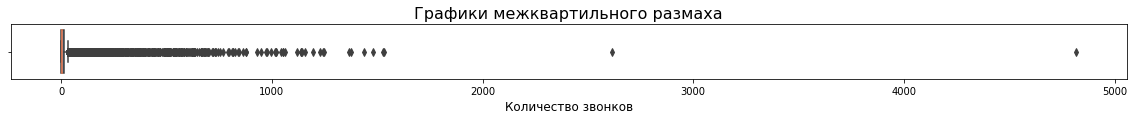

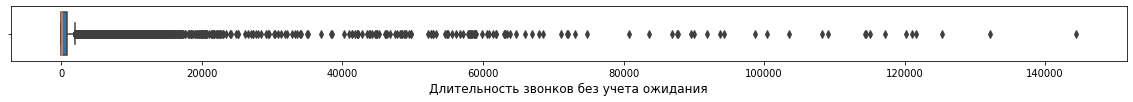

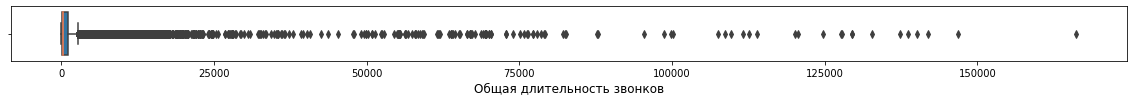

In [28]:
plt.figure(figsize=(20,1))
plt.title('Графики межквартильного размаха',  fontsize=16)
sns.boxplot(data=df, x='calls_count',medianprops={"color": "coral"})
plt.xlabel('Количество звонков', fontsize=12)
plt.show()

plt.figure(figsize=(20,1))
sns.boxplot(data=df, x='call_duration',medianprops={"color": "coral"})
plt.xlabel('Длительность звонков без учета ожидания', fontsize=12)
plt.show()

plt.figure(figsize=(20,1))
sns.boxplot(data=df, x='total_call_duration',medianprops={"color": "coral"})
plt.xlabel('Общая длительность звонков', fontsize=12)
plt.show()

Увеличим нижнюю часть "boxplot"-ов, чтобы лучше разглядеть медианы и 75% квантиль

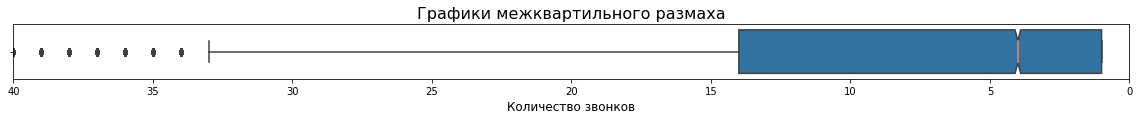

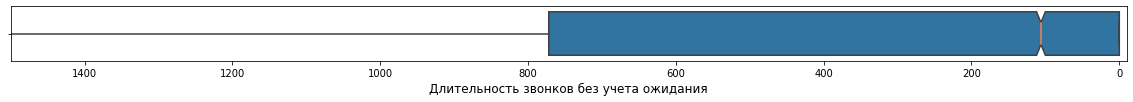

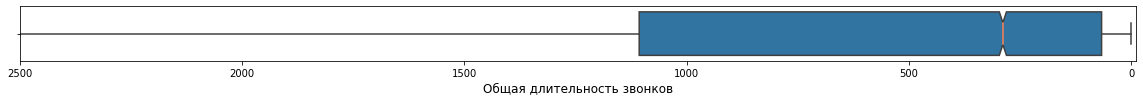

In [29]:
plt.figure(figsize=(20,1))
plt.title('Графики межквартильного размаха',  fontsize=16)
sns.boxplot(data=df, x='calls_count', notch=True, medianprops={"color": "coral"})
plt.xlabel('Количество звонков', fontsize=12)
plt.xlim(40,0)
plt.show()

plt.figure(figsize=(20,1))
sns.boxplot(data=df, x='call_duration', notch=True, medianprops={"color": "coral"})
plt.xlabel('Длительность звонков без учета ожидания', fontsize=12)
plt.xlim(1500,-10)
plt.show()

plt.figure(figsize=(20,1))
sns.boxplot(data=df, x='total_call_duration', notch=True, medianprops={"color": "coral"})
plt.xlabel('Общая длительность звонков', fontsize=12)
plt.xlim(2500,-10)
plt.show()

Выбросов мало, можно удалить все.
Посмортим значения 99 процентиля:

In [30]:
display(df[['calls_count', 'call_duration', 'total_call_duration']].quantile([0.95, 0.99]))

,calls_count,call_duration,total_call_duration
0.95,65.0,4161.5,5035.5
0.99,165.1,10988.3,13654.1


Не всегда аномальные значения означают выбросы.<br>
Удаляя по 95 процентилю мы теряем большую часть данных, которые в принципе являются абослютно реальными значениями:<br>
Что такое 62 звонка в сутки? - Абсолютно реальное значение,<br>
4161 и 5035 секнуд длительности звонков - это 69 и 84 минуты длительности звонков - так же абсолютно реальные значения.

Тем не менее выбросы по 99 процентилю удалю, чтобы при анализе они не тянули на себя срдение значения:

In [31]:
a = (df['calls_count'].quantile(0.99)).astype(int)
b = (df['call_duration'].quantile(0.99)).astype(int)
c = (df['total_call_duration'].quantile(0.99)).astype(int)
print(a,b,c)

165 10988 13654


In [32]:
df = df.loc[(df['calls_count'] < a) & 
            (df['call_duration'] < b) & 
            (df['total_call_duration'] < c)]

Построим боксплоты для столбцов с подозрением на аномалии:

<div style="border-radius: 22px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 16px">

**Выводы:**

Аномалии удалии по 99 процентилю

<a id='3-6'></a>

<font color='crimson'>

### Проверим категориальные столбцы
</font>

[К началу раздела](#3)<br>
[К соддержанию](#0)

Так как в данных часто содержатся опечатки или неявные дубликаты посмотрим все униальные значения категориальных столбцов и, при необходимости, обработаем их.
Посмотрим уникальные значения категорияльных столбцов и их относительное распределение:

In [33]:
# Запустим цикл для просмотра уникальных значений в категориальных столбцах:
def see_kategori_columns(df):
    for i in df:
        if df[i].nunique() < 50: # Если уникальных значений столбца больше условно 50 - будем считать его числовым, 
                                # в некоторых случаях 50 нужно уменьшить/увеличить
            print('    Уникальные значения столбца'+'\033[94m'+f' {i}:'+'\033[0m'+'')
            print(df[i].sort_values().unique())
            print('    Статистика распределения данных значений:')
            print(df[i].value_counts(normalize=True),'\n')

In [34]:
see_kategori_columns(df)

    Уникальные значения столбца direction:
['in' 'out']
    Статистика распределения данных значений:
out    0.690489
in     0.309511
Name: direction, dtype: float64 

    Уникальные значения столбца internal:
[False  True]
    Статистика распределения данных значений:
False    0.869548
True     0.130452
Name: internal, dtype: float64 

    Уникальные значения столбца is_missed_call:
[False  True]
    Статистика распределения данных значений:
False    0.666626
True     0.333374
Name: is_missed_call, dtype: float64 

    Уникальные значения столбца tariff_plan:
['A' 'B' 'C']
    Статистика распределения данных значений:
C    0.360590
B    0.353468
A    0.285942
Name: tariff_plan, dtype: float64 



<div style="border-radius: 22px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 16px">

**Выводы:**

* Исходящих вызовов значительно больше, чем входящих.
* В основном звонки внешние - это логично.
* Треть звонков - пропущенные.
* В данных представлены 3 тарифа - A, B и C. Наиболее популярный тариф С и В. У каждого колл-центра за исследуемый период был только один тариф - тарифы не менялись.<br> 

In [35]:
# Посмотрим, что осталось
temp = df.copy() 
list_c = ['user_id', 'date', 'direction', 'internal', 'operator_id',
       'is_missed_call', 'calls_count', 'call_duration', 'total_call_duration']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print('\033[94m Столбец ', col_l,'\033[0m', temp[col_l].sort_values().unique())
  print('\033[94m',col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().mean()*100,2),'%'+'\033[0m') 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40858 entries, 1 to 53899
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype                                
---  ------               --------------  -----                                
 0   user_id              40858 non-null  int64                                
 1   date                 40858 non-null  datetime64[ns, pytz.FixedOffset(180)]
 2   direction            40858 non-null  object                               
 3   internal             40858 non-null  bool                                 
 4   operator_id          40858 non-null  int32                                
 5   is_missed_call       40858 non-null  bool                                 
 6   calls_count          40858 non-null  int64                                
 7   call_duration        40858 non-null  int64                                
 8   total_call_duration  40858 non-null  int64                                
 9   tariff

Сгруппируем данные по типам звонков и проверим каких звонков больше:

In [36]:
call_type_group = df.groupby(['direction','internal','is_missed_call'])['user_id'].agg('count')
call_type_group = call_type_group.reset_index()
call_type_group

,direction,internal,is_missed_call,user_id
0,in,False,False,11858
1,in,False,True,402
2,in,True,False,378
3,in,True,True,8
4,out,False,False,12427
5,out,False,True,10841
6,out,True,False,2574
7,out,True,True,2370


Для восприятия и анализа будет удобнее, если для каждого вызова мы агрегируем его тип на русском языке, 
например: внешний, входящий, пропущеный:

In [37]:
call_type_group.columns = ['входящий/исходящий','внешний/внутрений','пропущенный/отвеченый','сумма_звонков']

def type_call(df):
    if df['входящий/исходящий'] == 'in':
        df['тип_звонка'] = 'входящий_'
    elif df['входящий/исходящий'] == 'out':
        df['тип_звонка'] = 'исходящий_'
    
    if df['внешний/внутрений'] == True:
        df['тип_звонка'] = df['тип_звонка'] + 'внутренний_'
    elif df['внешний/внутрений'] == False:
        df['тип_звонка'] = df['тип_звонка'] + 'внешний_'
        
    if df['пропущенный/отвеченый'] == True:
        df['тип_звонка'] = df['тип_звонка'] + 'пропущенный'
    elif df['пропущенный/отвеченый'] == False:
        df['тип_звонка'] = df['тип_звонка'] + 'непропущенный'
    return df

In [38]:
call_type_group = call_type_group.apply(type_call, axis=1)

In [39]:
call_type_group = call_type_group[['тип_звонка', 'сумма_звонков']]
call_type_group = call_type_group.sort_values(by='сумма_звонков', ascending=False)
# Было бы удобно оценить и доли
call_type_group['процент, %'] = round((call_type_group['сумма_звонков']/call_type_group['сумма_звонков'].sum()),3)*100
display(call_type_group)

,тип_звонка,сумма_звонков,"процент, %"
4,исходящий_внешний_непропущенный,12427,30.4
0,входящий_внешний_непропущенный,11858,29.0
5,исходящий_внешний_пропущенный,10841,26.5
6,исходящий_внутренний_непропущенный,2574,6.3
7,исходящий_внутренний_пропущенный,2370,5.8
1,входящий_внешний_пропущенный,402,1.0
2,входящий_внутренний_непропущенный,378,0.9
3,входящий_внутренний_пропущенный,8,0.0


Визуализируем данные:

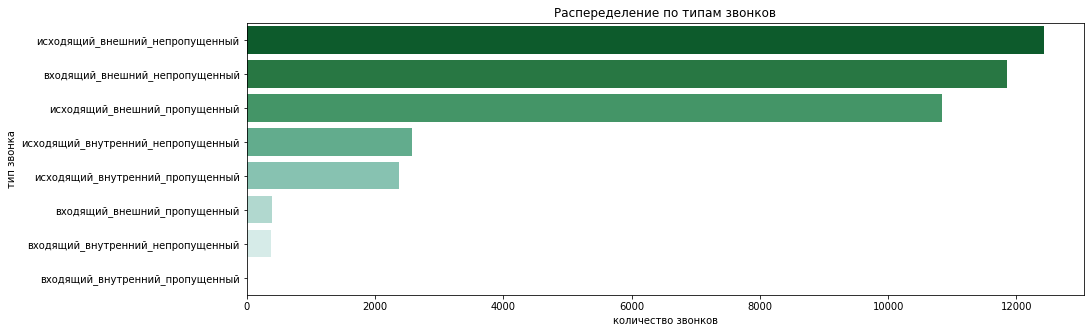

In [40]:
plt.figure(figsize=(15,5))
sns.barplot(data=call_type_group, y='тип_звонка', x="сумма_звонков",palette=sns.color_palette("BuGn_r", n_colors=len(call_type_group)))
plt.title('Распеределение по типам звонков')
plt.xlabel('количество звонков')
plt.ylabel('тип звонка')
plt.show()

Наиболее часто совершались внешние исходящие и входящие звонки. Это понятно - колл-центры нацелены на работу с населением а не внутри компании.

<a id='3-8'></a>

<font color='crimson'>

### Отобразим корреляцию
</font>

[К началу раздела](#3)<br>
[К соддержанию](#0)

Рассчитаем матрицу корреляций и на её основе построим heatmap

Чтобы посмотреть корреляцию с тарифами и входящими/исходящими звонками, переведем буквенные обозначения в цифровые:

In [41]:
# Функция для замены одного значения на другое
def replacing_values(data, column, wrong_values, correct_values):
    data[column] = data[column].replace(wrong_values, correct_values)

In [42]:
# Создадим вспомогательные столбцы, чтобы не портить основные данные
df['tariff'] = df['tariff_plan']
df['direct'] = df['direction']

# Оцифруем тарифы
replacing_values(df,['tariff'], 'A', 1)
replacing_values(df,['tariff'], 'B', 2)
replacing_values(df,['tariff'], 'C', 3)

# Оцифруем Входящие/исходящие
replacing_values(df,['direct'], 'in', 1)
replacing_values(df,['direct'], 'out', 0)

# Проверим
print('Тарифы: ', df['tariff'].sort_values().unique())
print('Вх-ие/Исх-ие: ', df['direct'].sort_values().unique())

Тарифы:  [1 2 3]
Вх-ие/Исх-ие:  [0 1]


In [43]:
cm = df.corr()

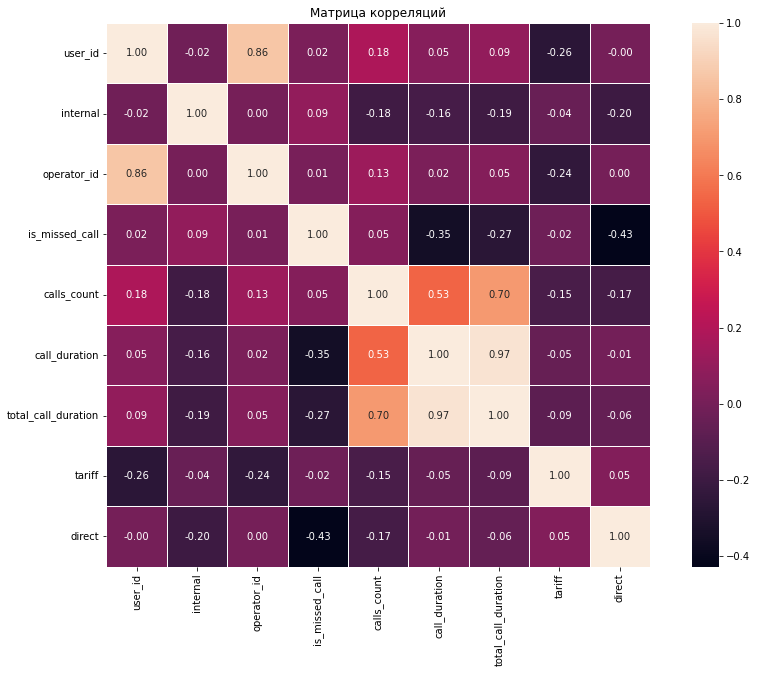

In [44]:
#нарисуем тепловую карту с подписями для матрицы корреляций
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot=True, linewidth=1, square=True, fmt='.2f')
plt.title('Матрица корреляций')
plt.show()

Для оценки тесноты, или силы, корреляционной связи мы будем использовать общепринятые критерии, согласно которым абсолютные значения корреляции < 0.3 свидетельствуют о слабой связи, <br>
значения корреляции от 0.3 до 0.7 - о связи средней тесноты, <br>
значения корреляции > 0.7 - о сильной связи.

Сильная корреляция между столбцами длительности звонков - понятна.
Так же понятна и средняя корреляция между количеством звонков `calls_count` и их длительностью `call_duration`, `total_call_duration` - чем больше звонков тем больше и их длительность.
Скорее всего этим объясняется и средняя корреляция между длительностью звонков и маркером пропущенности `is_missed_call`, хотя с количестовом звонков данный маркер не коррелирует ни как.
Средняя кореляция между id операторов и входящимим/исходящими - не совсем ясна.
Посмотрим попарные дигарамм рассеяния для этих признаков:

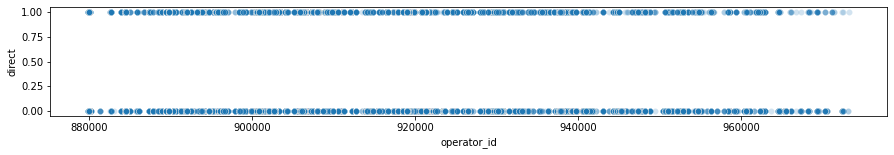

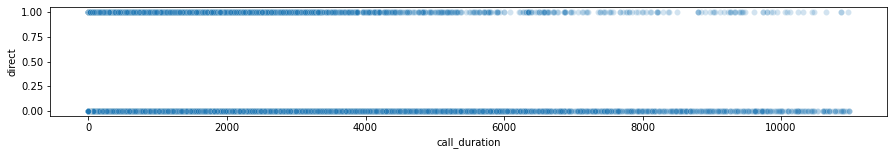

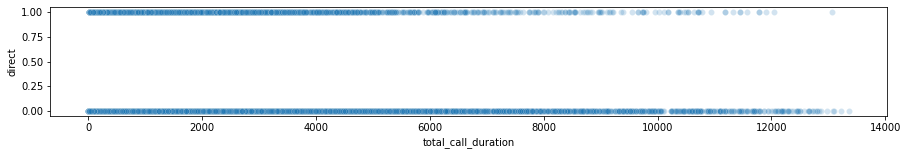

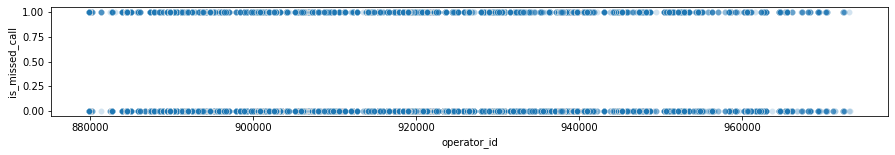

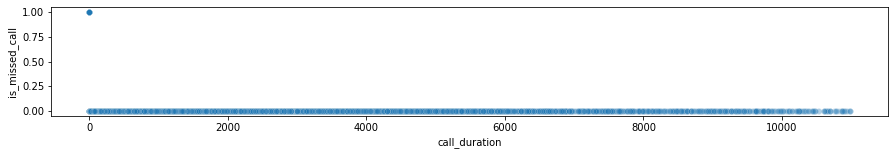

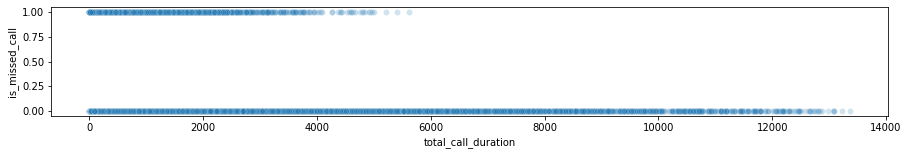

In [45]:
# построим попарные диаграммы рассеяния 
for i in ['direct', 'is_missed_call']:
    for col in ['operator_id','call_duration', 'total_call_duration']:
        plt.figure(figsize=(15,2))
        sns.scatterplot(x=df[col], y=df[i], alpha = 0.2)
        plt.show()

Анализ попарных дигарамм рассеяния дополнительных корреляций не обнаружил.
<br> Удалим вспомогательные столбцы:

In [46]:
df = df[['user_id', 'date', 'direction', 'internal', 'operator_id',
       'is_missed_call', 'calls_count', 'call_duration', 'total_call_duration',
       'tariff_plan', 'date_start']]
#df.head()

<a id='3-9'></a>

<font color='crimson'>

### Создадим дополнительные столбцы
</font>

[К началу раздела](#3)<br>
[К соддержанию](#0)

Создадим дополнительные столбцы:<br>
* общего времени ожидания вызова `wait_time`,
* среднего времени ожидания вызова `avg_waittm`,
* среднего времени разговора `avg_callt`,
* период работы оператора `lvt_oper_id`:

In [47]:
df['wait_time'] = df['total_call_duration'] - df['call_duration']
# среднего времени разговора avg_call_time
df['avg_callt'] = df['call_duration']/df['calls_count']
# среднего времени ообщей длительности звонка - avg_total_time:
# df['avg_total_time'] = df['total_call_duration']/df['calls_count']
df['avg_waittm'] = (df['total_call_duration'] - df['call_duration'])/df['calls_count']

df['wait_time'] = df['wait_time'].astype(int)
df['avg_waittm'] = df['avg_waittm'].astype(int)

In [48]:
# Преобразуем типы данных времени для подсчета
df['date'] = pd.to_datetime(df['date'],utc=False).dt.date
df['date_start'] = pd.to_datetime(df['date_start'],utc=False).dt.date
# Создадим столбец 
df['lvt_oper_id'] = df['date'] - df['date_start']
# Вернем тип данных в столбцах даты 
df['date'] = pd.to_datetime(df['date'])
df['date_start'] = pd.to_datetime(df['date_start'])

In [49]:
# Преобразуем период в число формата int, так необходимо для дальнейшего анализа
df['lvt_oper_id'] = df['lvt_oper_id'].dt.days
#df.info()
#df.head()

<a id='4'></a>

<font color='crimson'> 
<h2 align="center"> Исследовательский анализ данных</h2>
</font>
 

<a id='4-1'></a>

<font color='crimson'>

### Разделим колл-центры по специализации

на те, которые специализируются на обзвонах, и те, что специализируются на обработке входящих звонков.<br>
</font>

[К началу раздела](#4)<br>
[К соддержанию](#0)

Создадим новый столбец где будет обозначено к какой специализации относится колл-центр

Будем считать, что те колл-центры у которых **исходящих внешних** звонков больше, чем внешних входящих - специализируются на обзвонах.
И, напротив, те у кого входящих внешних больше - специализируются на обработке входящих звонков.

Сгруппируем данные

In [50]:
# выберем только внешние звонки
user_type = df.loc[df['internal'] == False]
# сгруппируем данные по клиентам
user_type = user_type.groupby(['user_id','direction'])['operator_id'].agg('count').reset_index()
# нам не нужен именно столбец operator_id - для подсчета count, так как пропусков нет - 
# нужен был любой столбец кроме группируемых, поэтому переименуем в count
user_type = user_type.rename(columns={'operator_id':'count'})

display(user_type)

print(
    'проверим не пропал ли кто из клиентов, \n должно быть', df['user_id'].nunique(),' клиентов, \n текущих клиентов:',
    user_type['user_id'].nunique()
     )

,user_id,direction,count
0,166377,in,74
1,166377,out,374
2,166391,in,4
3,166392,in,47
4,166399,in,9
...,...,...,...
488,168601,in,16
489,168601,out,37
490,168603,out,6
491,168606,in,2


проверим не пропал ли кто из клиентов, 
 должно быть 290  клиентов, 
 текущих клиентов: 290


Теперь разделим колл-центры:

In [51]:
user_type = user_type.pivot_table(index='user_id', columns = 'direction').reset_index()
user_type = user_type.droplevel(0, axis=1)
user_type.columns = ['user_id','in','out']

user_type

,user_id,in,out
0,166377,74.0,374.0
1,166391,4.0,NaN
2,166392,47.0,NaN
3,166399,9.0,NaN
4,166405,248.0,579.0
...,...,...,...
285,168583,13.0,NaN
286,168598,9.0,NaN
287,168601,16.0,37.0
288,168603,NaN,6.0


In [52]:
user_type = user_type.fillna(0)
user_type['type'] = 0

In [53]:
for i in range(0,290):
    if user_type['in'][i] > user_type['out'][i]:
        user_type['type'][i] = 'прием'
    elif user_type['in'][i] < user_type['out'][i]:
        user_type['type'][i] = 'обзвон'
    else: user_type['type'][i] = 'неопределенный'

user_type

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\Артур Ринатович\AppData\Roaming\Python\Python37\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,user_id,in,out,type
0,166377,74.0,374.0,обзвон
1,166391,4.0,0.0,прием
2,166392,47.0,0.0,прием
3,166399,9.0,0.0,прием
4,166405,248.0,579.0,обзвон
...,...,...,...,...
285,168583,13.0,0.0,прием
286,168598,9.0,0.0,прием
287,168601,16.0,37.0,обзвон
288,168603,0.0,6.0,обзвон


2 колл-центров по такой методике определить не удалось, посмотрим на них:

In [54]:
user_type.loc[user_type['type'] == 'неопределенный']

,user_id,in,out,type
104,167113,1.0,1.0,неопределенный
168,167599,1.0,1.0,неопределенный


In [55]:
#user_type_graf = user_type[['тип_звонка', 'сумма_звонков']]
user_type_graf = user_type.groupby('type')['user_id'].count().reset_index()
user_type_graf = user_type_graf.sort_values(by='user_id', ascending=False)
user_type_graf
#call_type_group['процент, %'] = round((call_type_group['сумма_звонков']/call_type_group['сумма_звонков'].sum()),3)*100
#display(call_type_group)

,type,user_id
1,обзвон,164
2,прием,124
0,неопределенный,2


Визуализируем данные:

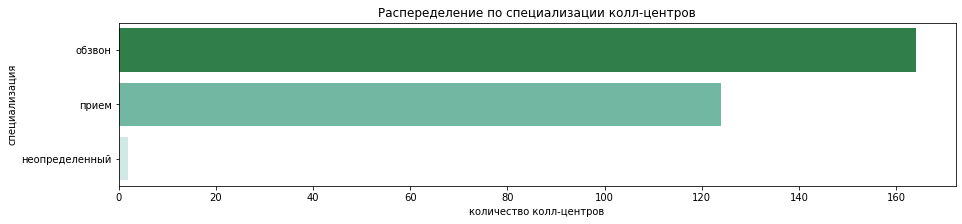

In [56]:
plt.figure(figsize=(15,3))
sns.barplot(data=user_type_graf, y='type', x="user_id",palette=sns.color_palette("BuGn_r", n_colors=len(user_type_graf)))
plt.title('Распеределение по специализации колл-центров')
plt.xlabel('количество колл-центров')
plt.ylabel('специализация')
plt.show()

Объединим датафрейм с основным

In [57]:
user_type = user_type[['user_id', 'type']]

In [58]:
df2 = df.merge(user_type, on='user_id', how='left')
df2.head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,tariff_plan,date_start,wait_time,avg_callt,avg_waittm,lvt_oper_id,type
0,166377,2019-08-05,out,True,880022,True,3,0,5,B,2019-08-01,5,0.0,1,4,обзвон
1,166377,2019-08-05,out,True,880020,True,1,0,1,B,2019-08-01,1,0.0,1,4,обзвон
2,166377,2019-08-05,out,True,880020,False,1,10,18,B,2019-08-01,8,10.0,8,4,обзвон
3,166377,2019-08-05,out,False,880022,True,3,0,25,B,2019-08-01,25,0.0,8,4,обзвон
4,166377,2019-08-05,out,False,880020,False,2,3,29,B,2019-08-01,26,1.5,13,4,обзвон


**Соберем колл-центры, которые специализируются на обработке входящих звонков<br>
и тех, которые специализируются на обзвоне**

In [59]:
# Соберем колл-центры, которые специализируются на обработке входящих звонков
df_in = df2.loc[df2['type'] == 'прием']
# Соберем колл-центры, которые специализируются на обзвоне
df_out = df2.loc[df2['type'] == 'обзвон']

In [60]:
print('Уникальных клиентов в колл-центрах,\n которые специализируются на обработке входящих звонков: ',df_in['user_id'].nunique(),'\n')
print(df_in.info())

Уникальных клиентов в колл-центрах,
 которые специализируются на обработке входящих звонков:  124 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6361 entries, 482 to 40788
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              6361 non-null   int64         
 1   date                 6361 non-null   datetime64[ns]
 2   direction            6361 non-null   object        
 3   internal             6361 non-null   bool          
 4   operator_id          6361 non-null   int32         
 5   is_missed_call       6361 non-null   bool          
 6   calls_count          6361 non-null   int64         
 7   call_duration        6361 non-null   int64         
 8   total_call_duration  6361 non-null   int64         
 9   tariff_plan          6361 non-null   object        
 10  date_start           6361 non-null   datetime64[ns]
 11  wait_time            6361 non-null   int32  

In [61]:
print('Уникальных клиентов в колл-центрах, \n которые специализируются на обзвоне: ',df_out['user_id'].nunique(),'\n')
print(df_out.info())

Уникальных клиентов в колл-центрах, 
 которые специализируются на обзвоне:  164 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34493 entries, 0 to 40857
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              34493 non-null  int64         
 1   date                 34493 non-null  datetime64[ns]
 2   direction            34493 non-null  object        
 3   internal             34493 non-null  bool          
 4   operator_id          34493 non-null  int32         
 5   is_missed_call       34493 non-null  bool          
 6   calls_count          34493 non-null  int64         
 7   call_duration        34493 non-null  int64         
 8   total_call_duration  34493 non-null  int64         
 9   tariff_plan          34493 non-null  object        
 10  date_start           34493 non-null  datetime64[ns]
 11  wait_time            34493 non-null  int32         
 12  avg_ca

<a id='4-2'></a>

<font color='crimson'>

### Проверим связь специализации с тарифным планом
</font>

[К началу раздела](#4)<br>
[К соддержанию](#0)

In [62]:
# Количество звонков на разных тарифах у разных клиентов
tariff_associated = df2.pivot_table(
    index='type', columns=('tariff_plan'), values='user_id', aggfunc='count').fillna(0)
tariff_associated

tariff_plan,A,B,C
type,,,
неопределенный,0.0,0.0,4.0
обзвон,10374.0,11860.0,12259.0
прием,1309.0,2582.0,2470.0


In [63]:
tariff_associated = df2.groupby(['type','tariff_plan'])['user_id'].nunique().reset_index()
tariff_associated['процент'] = round((tariff_associated['user_id']/tariff_associated['user_id'].sum()),3)*100
#tariff_associated['процент_от_типа'] = round((tariff_associated['user_id']/(delit)),3)*100
tariff_associated

,type,tariff_plan,user_id,процент
0,неопределенный,C,2,0.7
1,обзвон,A,22,7.6
2,обзвон,B,72,24.8
3,обзвон,C,70,24.1
4,прием,A,10,3.4
5,прием,B,29,10.0
6,прием,C,85,29.3


In [64]:
tariff_associated = df_in.groupby(['type','tariff_plan'])['user_id'].nunique().reset_index()
tariff_associated['процент'] = round((tariff_associated['user_id']/tariff_associated['user_id'].sum()),3)*100
#tariff_associated['процент_от_типа'] = round((tariff_associated['user_id']/(delit)),3)*100
tariff_associated

,type,tariff_plan,user_id,процент
0,прием,A,10,8.1
1,прием,B,29,23.4
2,прием,C,85,68.5


In [65]:
tariff_associated = df_out.groupby(['type','tariff_plan'])['user_id'].nunique().reset_index()
tariff_associated['процент'] = round((tariff_associated['user_id']/tariff_associated['user_id'].sum()),3)*100
#tariff_associated['процент_от_типа'] = round((tariff_associated['user_id']/(delit)),3)*100
tariff_associated

,type,tariff_plan,user_id,процент
0,обзвон,A,22,13.4
1,обзвон,B,72,43.9
2,обзвон,C,70,42.7



Наиболее предпочтительным тарифом у колл-центров специализирующихся на приеме звонков является тариф `С`.
Но, по большому счету, связи между тарифным планом и специализацией колл_центров не обнаружена - и у обзванивающих и у принимающих звонки - тарифы распределены по разным категориям, без сильных перекосов.

<a id='4-3'></a>

<font color='crimson'>

### Оперелим границы эффективности операторов в колл-центрах,<br>которые **специализируются на обработке входящих звонков**
</font>

[К началу раздела](#4)<br>
[К соддержанию](#0)

<a id='4-3-1'></a>

<font color='crimson'>

#### по пропущенным внешним вызовам
</font>


Для начала отфильтруем только внешние входящие пропущенные:

In [66]:
missed_call = df_in.loc[(df_in['direction']=='in')&(df_in['internal']==False)&(df_in['is_missed_call']==True)]

Теперь посмортим как часто операторы пропускали звонки в разрезе за каждый день:

In [67]:
missed_call = missed_call.groupby(['user_id','operator_id', 'lvt_oper_id'])['calls_count'].sum().reset_index()
# Переименуем целевой столбец чтобы отличать его от одноименного
missed_call = missed_call.rename(columns={'calls_count':'count_missed'})
# Отсортируем по убыванию пропущеных звонков
missed_call = missed_call.sort_values(by='count_missed', ascending=False)
missed_call

,user_id,operator_id,lvt_oper_id,count_missed
97,167200,905862,28,13
161,167977,944226,31,8
157,167977,944226,16,4
160,167977,944226,22,4
30,166582,885890,38,3
...,...,...,...,...
64,167059,911142,22,1
65,167071,913938,48,1
66,167071,913938,50,1
67,167071,913938,56,1


Наибольшее количество пропущенных внешних звонков - 13.
и далеее стрмительно уменьшается.
Напомню, что это в тех колл-центрах, которые специализируются на обработке входящих звонков.
Теперь определим 95 и 99 процентиль:

In [68]:
missed_call['count_missed'].quantile([0.95,0.99])

0.95    3.00
0.99    5.08
Name: count_missed, dtype: float64

In [69]:
eff_missed_call = (missed_call['count_missed'].quantile(0.99)).astype(int)
eff_missed_call

5

<div style="border-radius: 22px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 16px">

**Вывод:**

Примем за неэффективных тех операторов, кто допустил больше 5 пропущенных вызовов.


<a id='4-3-2'></a>

<font color='crimson'>

#### по длительности ожидания ответа
</font>


In [70]:
avg_wait_call = df_in.groupby(['user_id','operator_id','date','lvt_oper_id'])['avg_waittm'].mean().reset_index()
avg_wait_call = avg_wait_call.sort_values(by='avg_waittm', ascending=False)
avg_wait_call.head(10)

,user_id,operator_id,date,lvt_oper_id,avg_waittm
952,166879,896536,2019-11-02,72,150.0
304,166541,910958,2019-09-18,42,110.0
1022,166879,927070,2019-11-22,92,96.0
310,166541,910958,2019-10-13,67,96.0
982,166879,896538,2019-10-15,54,88.0
1815,167059,911140,2019-09-25,27,87.0
53,166399,886674,2019-09-02,32,80.0
985,166879,896538,2019-11-15,85,79.0
1006,166879,927070,2019-10-16,55,76.0
958,166879,896536,2019-11-08,78,75.0


 И снова самыми неэффективными оказались те, чьи ID отсутсвует.
 Отфильтруем по operator_id и сразу возьмем последний месяц исследуемого периода:

In [71]:
eff_wait_time = avg_wait_call['avg_waittm'].quantile([0.95,0.99])
eff_wait_time

0.95    39.0
0.99    58.0
Name: avg_waittm, dtype: float64

до 39 секунд в среднем на звонок - допускают ожидание при ответе 95 % операторов, тех колл-центров, которые специализируются на обработке входящих звонков!
Кажется это много?
Но разве Вам не попадались эта фраза: "Ваш звонок очень важен для Вас, Вы 150 в очереди, Вам ответит ближайший проснувшийся оператор" ? После чего мы слушаем музыку.

In [72]:
eff_wait_time = (avg_wait_call['avg_waittm'].quantile(0.95)).astype(int)

<div style="border-radius: 22px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 16px">

**Вывод:**

Границей эффективности по ожиданию ответа на входящий внешний звонок будем считать по 95 процентилю - 39 секунд.

<a id='4-3-3'></a>

<font color='crimson'>

#### по длительности самого ответа
</font>


Сгруппируем данные - для каждого оператора в качестве среднего возьмем не только среднее время одного звонка, но общее время звонка, чтобы понимать сколько по времени оператору звонили.

In [73]:
# dur_resp образованно от duration_response
dur_resp = (df_in.groupby(['user_id',
                          'operator_id',
                          'date',
                          'lvt_oper_id'])[['avg_callt',
                                           'total_call_duration',
                                           'calls_count']].agg({'avg_callt':'mean',
                                                                'total_call_duration':'mean',
                                                                'calls_count':'sum'}).reset_index()
           )
dur_resp = dur_resp.sort_values(by='avg_callt', ascending=False)
dur_resp

,user_id,operator_id,date,lvt_oper_id,avg_callt,total_call_duration,calls_count
747,166713,891908,2019-11-17,94,1765.0,1791.0,1
2551,167176,907994,2019-10-15,40,1515.5,3066.0,2
104,166428,928202,2019-10-15,74,1471.0,1488.0,1
3483,167644,924546,2019-10-28,34,1470.0,1486.0,1
1676,167052,904044,2019-10-11,43,1229.0,1274.0,1
...,...,...,...,...,...,...,...
592,166604,893420,2019-09-20,39,0.0,8.0,1
391,166582,885876,2019-11-08,91,0.0,536.0,14
1319,166901,896016,2019-10-16,54,0.0,29.0,1
3613,167742,955164,2019-11-06,40,0.0,9.0,1


Максимальная длительность ответа составила около 30 минут.
Но есть "сверхбыстрые" операторы, средний ответ которых составлял менее секунды.

Не могу не заметить количество принятых звонков в день: 1-2 - они янво не любители перерабатывать.
Уволить всех!

In [74]:
dur_resp[['avg_callt','total_call_duration','calls_count']].quantile([0.05,0.1,0.95,0.99])

,avg_callt,total_call_duration,calls_count
0.05,4.0000,21.575,1.00
0.10,11.0000,33.000,1.00
0.95,283.0000,2297.650,33.00
0.99,567.6775,4202.850,119.57


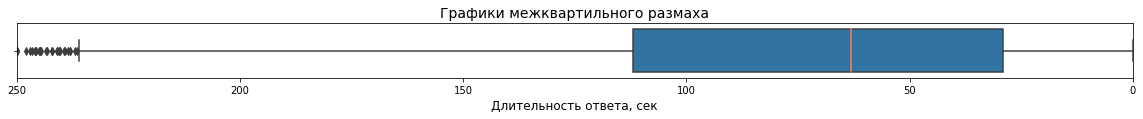

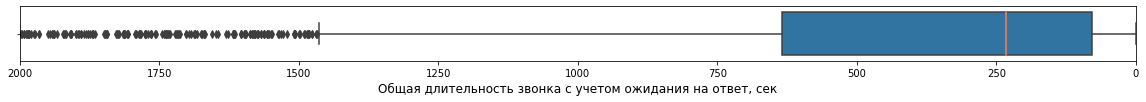

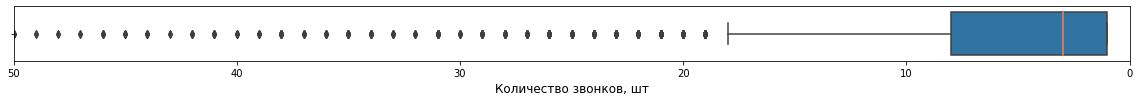

In [75]:
plt.figure(figsize=(20,1))
plt.title('Графики межквартильного размаха',  fontsize=14)
sns.boxplot(data=dur_resp, x='avg_callt', medianprops={"color": "coral"})
plt.xlabel('Длительность ответа, сек', fontsize=12)
plt.xlim(250,0)
plt.show()
plt.figure(figsize=(20,1))
sns.boxplot(data=dur_resp, x='total_call_duration', medianprops={"color": "coral"})
plt.xlabel('Общая длительность звонка с учетом ожидания на ответ, сек', fontsize=12)
plt.xlim(2000,0)
plt.show()
plt.figure(figsize=(20,1))
sns.boxplot(data=dur_resp, x='calls_count', medianprops={"color": "coral"})
plt.xlabel('Количество звонков, шт', fontsize=12)
plt.xlim(50,0)
plt.show()

Считаю, что верхнюю границу по длительности ответа брать по 95 процентилю - не стоит, так как это меньше 5 минут. Лучше возьмем по 99 процентилю - если ты регулярно тратитшь на ответ дольше, чем 99 % операторов - ты либо слишком долгий, либо надо проанализировать, что в твоей работе не так.

Нижняя граница в 8 секунд на мой взгялд вполне адекватна - если мы рассматриваем колл-центры, которые специализируются на обработке входящих звонков, то входящие звонки идут от людей с какими-то вопросами.
За 8 секунд можно выслушать вопрос, и положить трубку.

In [76]:
lower_eff_resp = (dur_resp['avg_callt'].quantile(0.05)).astype(int)
upper_eff_resp = (dur_resp['avg_callt'].quantile(0.99)).astype(int)
print(lower_eff_resp,'\n', upper_eff_resp)

4 
 567


<div style="border-radius: 22px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 16px">

**Вывод:**

Принимаем:
    За нижнюю границу эффективности по длительности ответа = 8 секунд,
    за верхнюю = 571 секунда.

In [77]:
print(f'eff_missed_call - граница по количеству пропущенных внешних входящих в месяц = {round(eff_missed_call,0)} шт.')
print(f'eff_wait_time - граница по среднему времени ожидания = {round(eff_wait_time,0)} секунд')
print(f'lower_eff_resp - нижняя граница по среднему времени ответа = {round(lower_eff_resp,0)} секунд')
print(f'upper_eff_resp - верхняя граница по среднему времени ответа = {round(upper_eff_resp,0)} секунд')


eff_missed_call - граница по количеству пропущенных внешних входящих в месяц = 5 шт.
eff_wait_time - граница по среднему времени ожидания = 39 секунд
lower_eff_resp - нижняя граница по среднему времени ответа = 4 секунд
upper_eff_resp - верхняя граница по среднему времени ответа = 567 секунд


<a id='4-4'></a>

<font color='crimson'>

### Опереление границ эффективности операторов в колл-центрах,<br>которые **специализируются на обзвонах**
</font>

[К началу раздела](#4)<br>
[К соддержанию](#0)

<a id='4-4-1'></a>

<font color='crimson'>

#### по количеству исходящих внешних звонков
</font>


In [78]:
# dur_resp образованно от duration_response
# ОТсортируем только исходящие внешние
dur_resp_out = df_out.query('direction == "out" and internal ==False')

In [79]:
dur_resp_out = dur_resp_out.groupby(['user_id','operator_id'])['calls_count'].sum().reset_index()
# Отсортируем по убыванию пропущеных звонков
dur_resp_out = dur_resp_out.sort_values(by='calls_count', ascending=False)
dur_resp_out

,user_id,operator_id,calls_count
16,166406,879898,7191
687,168361,945286,5982
413,167626,919364,4820
243,167112,904016,4676
702,168361,945322,4069
...,...,...,...
682,168361,945274,1
528,168062,947596,1
353,167497,918958,1
62,166536,900192,1


In [80]:
dur_resp_out['calls_count'].quantile([0.05,0.1,0.95,0.99])

0.05       1.00
0.10       3.00
0.95    2292.00
0.99    3376.65
Name: calls_count, dtype: float64

In [81]:
out_lower_eff = (dur_resp_out['calls_count'].quantile(0.05)).astype(int)
out_upper_eff = (dur_resp_out['calls_count'].quantile(0.95)).astype(int)

In [82]:
print('Сводные данные по границам эффективности:')
print(f'    eff_missed_call - граница по количеству пропущенных внешних входящих в месяц = {round(eff_missed_call,0)} шт.')
print(f'    eff_wait_time - граница по среднему времени ожидания = {round(eff_wait_time,0)} секунд')
print(f'    lower_eff_resp - нижняя граница по среднему времени ответа = {round(lower_eff_resp,0)} секунд')
print(f'    upper_eff_resp - верхняя граница по среднему времени ответа = {round(upper_eff_resp,0)} секунд')
print(f'    out_lower_eff - нижняя граница по количеству исходящих внешних звонков = {out_lower_eff} шт.')
print(f'    out_upper_eff - верхняя граница по количеству исходящих внешних звонков = {out_upper_eff} шт.')


Сводные данные по границам эффективности:
    eff_missed_call - граница по количеству пропущенных внешних входящих в месяц = 5 шт.
    eff_wait_time - граница по среднему времени ожидания = 39 секунд
    lower_eff_resp - нижняя граница по среднему времени ответа = 4 секунд
    upper_eff_resp - верхняя граница по среднему времени ответа = 567 секунд
    out_lower_eff - нижняя граница по количеству исходящих внешних звонков = 1 шт.
    out_upper_eff - верхняя граница по количеству исходящих внешних звонков = 2291 шт.


<a id='4-4-2'></a>

<font color='crimson'>

#### по продолжительности самого звонка
</font>


In [83]:
df_out.head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,tariff_plan,date_start,wait_time,avg_callt,avg_waittm,lvt_oper_id,type
0,166377,2019-08-05,out,True,880022,True,3,0,5,B,2019-08-01,5,0.0,1,4,обзвон
1,166377,2019-08-05,out,True,880020,True,1,0,1,B,2019-08-01,1,0.0,1,4,обзвон
2,166377,2019-08-05,out,True,880020,False,1,10,18,B,2019-08-01,8,10.0,8,4,обзвон
3,166377,2019-08-05,out,False,880022,True,3,0,25,B,2019-08-01,25,0.0,8,4,обзвон
4,166377,2019-08-05,out,False,880020,False,2,3,29,B,2019-08-01,26,1.5,13,4,обзвон


In [84]:
wait_call = df_out.groupby(['user_id','operator_id','date'])['avg_callt'].mean().reset_index()
wait_call = wait_call.sort_values(by='avg_callt', ascending=False)
wait_call.head(10)

,user_id,operator_id,date,avg_callt
2302,166658,890412,2019-09-11,2899.0
2797,166658,891166,2019-10-10,2607.0
2593,166658,891154,2019-10-11,2236.0
2810,166658,891166,2019-10-31,1942.0
2620,166658,891154,2019-11-20,1932.5
2617,166658,891154,2019-11-15,1870.0
2690,166658,891158,2019-11-15,1852.5
2609,166658,891154,2019-11-05,1780.5
8675,167455,918390,2019-11-12,1629.0
2685,166658,891158,2019-11-06,1559.0


In [85]:
wait_call['avg_callt'].quantile([0.05,0.1,0.95,0.99]).reset_index()

,index,avg_callt
0,0.05,0.000000
1,0.10,11.056250
2,0.95,254.902778
3,0.99,591.445000


In [86]:
out_lower_call = (wait_call['avg_callt'].quantile(0.10)).astype(int)
out_upper_call = (wait_call['avg_callt'].quantile(0.99)).astype(int)

In [87]:
print('Сводные данные по границам эффективности:')
print(' для колл-центров, которые специализируются на обработке входящих звонков:')
print(f'    eff_missed_call - граница по количеству пропущенных внешних входящих = {eff_missed_call} шт.')
print(f'    eff_wait_time - граница по среднему времени ожидания = {eff_wait_time} секунд')
print(f'    lower_eff_resp - нижняя граница по среднему времени ответа = {round(lower_eff_resp,0)} секунд')
print(f'    upper_eff_resp - верхняя граница по среднему времени ответа = {round(upper_eff_resp,0)} секунд')
print(' для колл-центров, которые специализируются на обзвонах:')
print(f'    out_lower_eff - нижняя граница по количеству исходящих внешних звонков = {round(out_lower_eff,0)} шт.')
print(f'    out_upper_eff - верхняя граница по количеству исходящих внешних звонков = {round(out_upper_eff,0)} шт.')
print(f'    out_lower_call - нижняя граница по средней длительности общения исходящего внешнего звонка = {round(out_lower_call,0)} секунд')
print(f'    out_upper_call - верхняя граница по средней длительности общения исходящего внешнего звонка = {round(out_upper_call,0)} секунд')


Сводные данные по границам эффективности:
 для колл-центров, которые специализируются на обработке входящих звонков:
    eff_missed_call - граница по количеству пропущенных внешних входящих = 5 шт.
    eff_wait_time - граница по среднему времени ожидания = 39 секунд
    lower_eff_resp - нижняя граница по среднему времени ответа = 4 секунд
    upper_eff_resp - верхняя граница по среднему времени ответа = 567 секунд
 для колл-центров, которые специализируются на обзвонах:
    out_lower_eff - нижняя граница по количеству исходящих внешних звонков = 1 шт.
    out_upper_eff - верхняя граница по количеству исходящих внешних звонков = 2291 шт.
    out_lower_call - нижняя граница по средней длительности общения исходящего внешнего звонка = 11 секунд
    out_upper_call - верхняя граница по средней длительности общения исходящего внешнего звонка = 591 секунд


<a id='5'></a>

<font color='crimson'>
<h2 align="center"> Определим неэффективных операторов</h2>
</font>

<a id='5-1'></a>

<font color='crimson'>

### Определим неэффективных операторов в колл-центрах, <br>которые **специализируются на обработке входящих звонков**

</font>

[К началу раздела](#5)<br>
[К соддержанию](#0)

<a id='5-1-1'></a>

<font color='crimson'>

#### по количеству пропущенных внешних вызовов 
</font>


In [88]:
# Найдем кумулятивную сумму звонков на каждого опреатора за каждый день
mse = missed_call.groupby(['operator_id']).sum() \
  .groupby(level=0).cumsum().reset_index().sort_values(by=['count_missed'], ascending=False)
mse.head()

,operator_id,user_id,lvt_oper_id,count_missed
47,944226,2183701,436,28
2,885890,2665312,620,21
45,944220,1847747,310,17
43,944216,2183701,423,16
46,944222,1679770,335,15


<div style="border-radius: 22px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 16px">

**Выведем операторов кто совершал пропущенных звонков больше границы эффективности:**

In [89]:
print(f'    eff_missed_call - граница по количеству пропущенных внешних входящих = {eff_missed_call} шт.')

ineff_missed_call = mse.loc[mse['count_missed'] > eff_missed_call, ['user_id', 'operator_id', 'count_missed']]
ineff_missed_call

    eff_missed_call - граница по количеству пропущенных внешних входящих = 5 шт.


,user_id,operator_id,count_missed
47,2183701,944226,28
2,2665312,885890,21
45,1847747,944220,17
43,2183701,944216,16
46,1679770,944222,15
17,501600,905862,15
44,1679770,944218,14
1,1998984,885876,14
29,2004852,913938,13
30,1670710,913942,11


Найдем этих операторов в основном датасете:

In [90]:
list_ineff_missed_call = ineff_missed_call['operator_id']

In [91]:
list_ineff_missed_call = df_in.query('operator_id in @list_ineff_missed_call').sort_values(by=['date'], ascending=False)
list_ineff_missed_call

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,tariff_plan,date_start,wait_time,avg_callt,avg_waittm,lvt_oper_id,type
32654,167977,2019-11-28,out,False,944216,True,2,0,71,B,2019-10-08,71,0.000000,35,51,прием
5057,166541,2019-11-28,in,True,908960,False,1,36,43,A,2019-08-07,7,36.000000,7,113,прием
5384,166582,2019-11-28,out,False,885876,False,34,5357,5973,A,2019-08-09,616,157.558824,18,111,прием
5385,166582,2019-11-28,out,False,885876,True,17,0,504,A,2019-08-09,504,0.000000,29,111,прием
22025,167200,2019-11-28,in,False,905862,False,3,218,256,C,2019-09-06,38,72.666667,12,83,прием
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5064,166582,2019-08-13,in,False,885890,False,1,1,9,A,2019-08-09,8,1.000000,8,4,прием
5063,166582,2019-08-13,in,False,885890,False,15,1241,1442,A,2019-08-09,201,82.733333,13,4,прием
5060,166582,2019-08-12,out,False,885890,True,113,0,3691,A,2019-08-09,3691,0.000000,32,3,прием
5061,166582,2019-08-12,in,False,885890,False,5,532,570,A,2019-08-09,38,106.400000,7,3,прием


In [92]:
# Сгруппируем 
ineff_missed_call_graf = list_ineff_missed_call.groupby(['user_id', 'operator_id'])['lvt_oper_id'].first().reset_index()
ineff_missed_call_graf

,user_id,operator_id,lvt_oper_id
0,166541,908960,113
1,166582,885876,111
2,166582,885890,82
3,166582,925922,79
4,167071,913938,90
5,167071,913942,90
6,167162,905300,69
7,167200,905862,83
8,167977,944216,51
9,167977,944218,51


In [93]:
ineff_missed_call = ineff_missed_call[['operator_id', 'count_missed']]
ineff_missed_call_graf = ineff_missed_call_graf.merge(ineff_missed_call, on='operator_id', how='left')
ineff_missed_call_graf

,user_id,operator_id,lvt_oper_id,count_missed
0,166541,908960,113,8
1,166582,885876,111,14
2,166582,885890,82,21
3,166582,925922,79,6
4,167071,913938,90,13
5,167071,913942,90,11
6,167162,905300,69,6
7,167200,905862,83,15
8,167977,944216,51,16
9,167977,944218,51,14


In [94]:
ineff_missed_call_graf['пропущенные_относительно_лайфтайма'] = round(((ineff_missed_call_graf['count_missed'] / ineff_missed_call_graf['lvt_oper_id'])*100),1)
ineff_missed_call_graf.sort_values(by=['пропущенные_относительно_лайфтайма'], ascending=False)

,user_id,operator_id,lvt_oper_id,count_missed,пропущенные_относительно_лайфтайма
12,167977,944226,51,28,54.9
10,167977,944220,51,17,33.3
8,167977,944216,51,16,31.4
11,167977,944222,51,15,29.4
9,167977,944218,51,14,27.5
2,166582,885890,82,21,25.6
7,167200,905862,83,15,18.1
4,167071,913938,90,13,14.4
1,166582,885876,111,14,12.6
5,167071,913942,90,11,12.2


In [95]:
list_mse = mse['operator_id']

In [96]:
list_mse = df_in.query('operator_id in @list_mse').sort_values(by=['date'], ascending=False)
list_mse.head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,tariff_plan,date_start,wait_time,avg_callt,avg_waittm,lvt_oper_id,type
16746,167059,2019-11-28,in,False,911142,False,1,20,75,C,2019-08-29,55,20.00,55,91,прием
5707,166636,2019-11-28,out,False,890582,False,4,426,480,C,2019-08-12,54,106.50,13,108,прием
31257,167852,2019-11-28,in,False,932798,False,1,59,64,C,2019-10-02,5,59.00,5,57,прием
5581,166604,2019-11-28,in,False,893402,False,50,1013,2437,C,2019-08-12,1424,20.26,28,108,прием
5055,166541,2019-11-28,out,False,908960,True,1,0,7,A,2019-08-07,7,0.00,7,113,прием


In [97]:
# Сгруппируем 
list_mse_graf = list_mse.groupby(['user_id', 'operator_id'])['lvt_oper_id'].max().reset_index()
list_mse_graf.head(10)

,user_id,operator_id,lvt_oper_id
0,166428,882680,118
1,166482,934076,104
2,166541,908960,113
3,166582,885876,111
4,166582,885890,82
5,166582,925922,79
6,166604,893402,108
7,166604,893420,108
8,166636,890582,108
9,166669,888406,94


In [98]:
mse = mse[['operator_id', 'count_missed']]
list_mse_graf = list_mse_graf.merge(mse, on='operator_id', how='left')
list_mse_graf.head()

,user_id,operator_id,lvt_oper_id,count_missed
0,166428,882680,118,3
1,166482,934076,104,1
2,166541,908960,113,8
3,166582,885876,111,14
4,166582,885890,82,21


In [99]:
list_mse_graf['процент_пропущенных_относительно_лайфтайма'] = round(((list_mse_graf['count_missed'] / list_mse_graf['lvt_oper_id'])*100),1)
list_mse_graf = list_mse_graf.sort_values(by=['процент_пропущенных_относительно_лайфтайма'], ascending=False)
list_mse_graf.head(10)

,user_id,operator_id,lvt_oper_id,count_missed,процент_пропущенных_относительно_лайфтайма
46,167977,944226,51,28,54.9
44,167977,944220,51,17,33.3
42,167977,944216,51,16,31.4
45,167977,944222,51,15,29.4
43,167977,944218,51,14,27.5
4,166582,885890,82,21,25.6
49,168307,945046,11,2,18.2
31,167200,905862,83,15,18.1
22,167071,913938,90,13,14.4
3,166582,885876,111,14,12.6


Топ 10 с самой высокой долей внешних пропущенных вызовов

In [100]:
list_mse_graf = list_mse_graf.head(10)
list_mse_graf = list_mse_graf[['процент_пропущенных_относительно_лайфтайма', 'operator_id']]
list_mse_graf

,процент_пропущенных_относительно_лайфтайма,operator_id
46,54.9,944226
44,33.3,944220
42,31.4,944216
45,29.4,944222
43,27.5,944218
4,25.6,885890
49,18.2,945046
31,18.1,905862
22,14.4,913938
3,12.6,885876


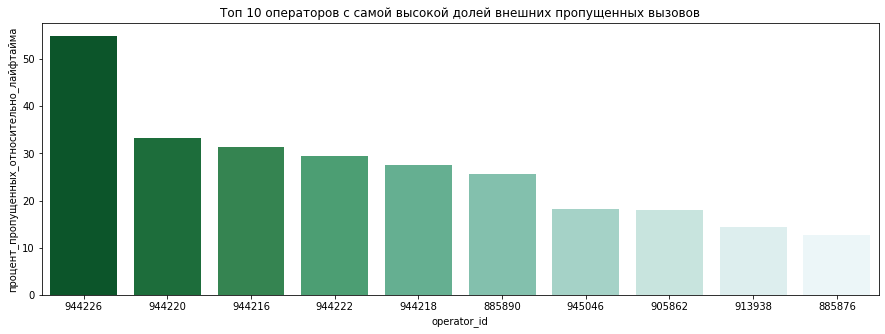

In [101]:
plt.figure(figsize=(15,5))
sns.barplot(data=list_mse_graf, y='процент_пропущенных_относительно_лайфтайма', 
            x="operator_id", 
            palette=sns.color_palette("BuGn_r", n_colors=len(list_mse_graf)),
           order=list_mse_graf.groupby('operator_id')['процент_пропущенных_относительно_лайфтайма'].agg('mean').sort_values(ascending=False).index)
plt.title('Топ 10 операторов с самой высокой долей внешних пропущенных вызовов')
plt.xlabel('operator_id')
plt.ylabel('процент_пропущенных_относительно_лайфтайма')
plt.show()

<a id='5-1-2'></a>

<font color='crimson'>

#### по длительности ожидания ответа

</font>


In [102]:
print(f'    eff_wait_time - граница по среднему времени ожидания = {eff_wait_time} секунд')

# Найдем среднее время ожидания вызова для каждого опеартора
ineff_wait_time = avg_wait_call.groupby('operator_id').mean().reset_index()
# Отсортируем их по границе эффективности
ineff_wait_time = ineff_wait_time.query('avg_waittm > @eff_wait_time')
ineff_wait_time=ineff_wait_time[['user_id', 'operator_id', 'avg_waittm']]
ineff_wait_time 

    eff_wait_time - граница по среднему времени ожидания = 39 секунд


,user_id,operator_id,avg_waittm
43,166879.0,896538,48.000000
50,166975.0,899900,58.000000
59,167003.0,901498,51.000000
63,166879.0,903512,42.750000
95,166541.0,908834,43.500000
99,167286.0,909768,42.000000
109,166541.0,910958,59.777778
115,167059.0,911142,46.384615
120,167272.0,912684,42.821429
152,166879.0,927070,44.250000


Для арезентации оставим только 10 самых самых:

In [103]:
ineff_wait_time_graf = ineff_wait_time.sort_values(by=['avg_waittm'], ascending=False).head(10)

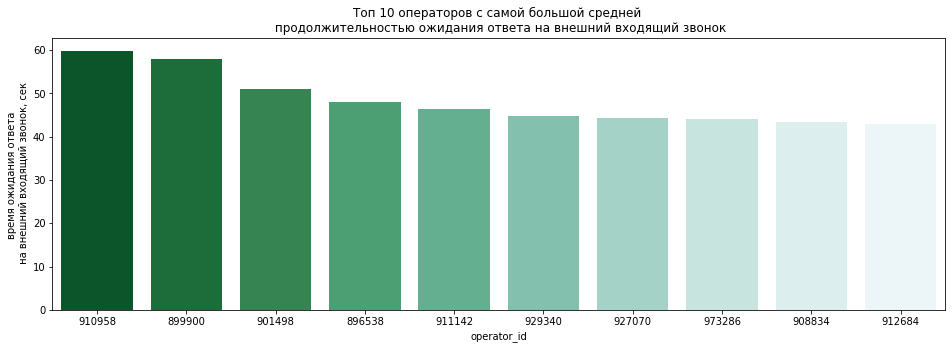

In [104]:
plt.figure(figsize=(16,5))
sns.barplot(data=ineff_wait_time_graf, y='avg_waittm', 
            x="operator_id", 
            palette=sns.color_palette("BuGn_r", n_colors=len(ineff_wait_time_graf)), 
            order=ineff_wait_time_graf.groupby('operator_id')['avg_waittm'].agg('mean').sort_values(ascending=False).index)
plt.title('Топ 10 операторов с самой большой средней \n продолжительностью ожидания ответа на внешний входящий звонок')
plt.xlabel('operator_id')
plt.ylabel('время ожидания ответа \n на внешний входящий звонок, сек')
plt.show()

<a id='5-1-3'></a>

<font color='crimson'>

#### по длительности ответа
</font>


In [105]:
print(f'    lower_eff_resp - нижняя граница по среднему времени ответа = {round(lower_eff_resp,0)} секунд')
# Найдем среднее время ответа для каждого опеартора
ineff_dur_resp  = dur_resp.groupby('operator_id').mean()
# Отсортируем их по нижней границе эффективности
ineff_lower_resp = ineff_dur_resp.query('avg_callt < @lower_eff_resp').reset_index() 
ineff_lower_resp = ineff_lower_resp[['user_id', 'operator_id', 'avg_callt']]
ineff_lower_resp

    lower_eff_resp - нижняя граница по среднему времени ответа = 4 секунд


,user_id,operator_id,avg_callt
0,167144.0,905082,2.5
1,167176.0,905308,0.0
2,167176.0,905480,0.0
3,167998.0,944908,1.5
4,166939.0,955068,0.0


In [106]:
ineff_lower_resp = ineff_lower_resp.sort_values(by=['avg_callt'], ascending=False)

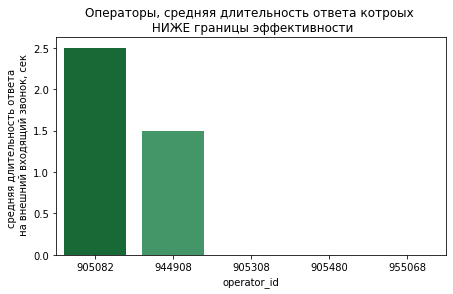

In [107]:
plt.figure(figsize=(7,4))
sns.barplot(data=ineff_lower_resp, y='avg_callt', 
            x="operator_id", 
            palette=sns.color_palette("BuGn_r", n_colors=len(ineff_lower_resp)), 
            order=ineff_lower_resp.groupby('operator_id')['avg_callt'].agg('mean').sort_values(ascending=False).index)
plt.title('Операторы, средняя длительность ответа котроых \n НИЖЕ границы эффективности')
plt.xlabel('operator_id')
plt.ylabel('средняя длительность ответа \n на внешний входящий звонок, сек')
plt.show()

In [108]:
print(f'    upper_eff_resp - верхняя граница по среднему времени ответа = {round(upper_eff_resp,0)} секунд')

# Отсортируем их по верхней границе эффективности
ineff_upper_resp = ineff_dur_resp.query('avg_callt > @upper_eff_resp').reset_index() 
ineff_upper_resp = ineff_upper_resp[['user_id', 'operator_id', 'avg_callt']].sort_values(by=['avg_callt'], ascending=False)
ineff_upper_resp 

    upper_eff_resp - верхняя граница по среднему времени ответа = 567 секунд


,user_id,operator_id,avg_callt
1,166975.0,899906,626.0
0,166975.0,899898,590.0


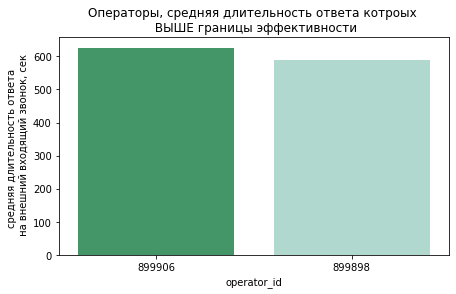

In [109]:
plt.figure(figsize=(7,4))
sns.barplot(data=ineff_upper_resp, y='avg_callt', 
            x="operator_id", 
            palette=sns.color_palette("BuGn_r", n_colors=len(ineff_upper_resp)), 
            order=ineff_upper_resp.groupby('operator_id')['avg_callt'].agg('mean').sort_values(ascending=False).index)
plt.title('Операторы, средняя длительность ответа котроых \n ВЫШЕ границы эффективности')
plt.xlabel('operator_id')
plt.ylabel('средняя длительность ответа \n на внешний входящий звонок, сек')
plt.show()

<a id='5-2'></a>

<font color='crimson'>

### Определим неэффективных операторов в колл-центрах,<br> которые **специализируются на обзвонах**

</font>

[К началу раздела](#5)<br>
[К соддержанию](#0)

<a id='5-2-1'></a>

<font color='crimson'>

#### по количеству исходящих внешних звонков
</font>


In [110]:
# Найдем кумулятивную сумму звонков на каждого опреатора за каждый день
ish = dur_resp_out.groupby(['operator_id']).sum() \
  .groupby(level=0).cumsum().reset_index().sort_values(by=['calls_count'], ascending=False)
ish.head()

,operator_id,user_id,calls_count
1,879898,166406,7191
566,945286,168361,5982
299,919364,167626,4820
158,904016,167112,4676
581,945322,168361,4069


In [111]:
print(f'    out_lower_eff - нижняя граница по количеству исходящих внешних звонков = {round(out_lower_eff,0)} шт.')

ineff_out_lower_resp = ish.loc[ish['calls_count'] < out_lower_eff, ['user_id', 'operator_id', 'calls_count']]
ineff_out_lower_resp

    out_lower_eff - нижняя граница по количеству исходящих внешних звонков = 1 шт.


,user_id,operator_id,calls_count


In [112]:
print(f'    out_upper_eff - верхняя граница по количеству исходящих внешних звонков = {round(out_upper_eff,0)} шт.')

ineff_out_dur_resp = ish.loc[ish['calls_count'] > out_upper_eff, ['user_id', 'operator_id', 'calls_count']]
ineff_out_dur_resp

    out_upper_eff - верхняя граница по количеству исходящих внешних звонков = 2291 шт.


,user_id,operator_id,calls_count
1,166406,879898,7191
566,168361,945286,5982
299,167626,919364,4820
158,167112,904016,4676
581,168361,945322,4069
572,168361,945302,3903
586,168018,945900,3812
80,166782,893804,3378
568,168361,945290,3373
81,166899,894656,3167


Меньше одного исходящего не совершал ни один оператор.
Посмотрим на всем датасете:

In [113]:
list_ish = ish['operator_id']

In [114]:
list_ish = df_out.query('operator_id in @list_ish').sort_values(by=['date'], ascending=False)
list_ish.head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,tariff_plan,date_start,wait_time,avg_callt,avg_waittm,lvt_oper_id,type
29590,167654,2019-11-28,out,False,918986,False,23,2399,2819,B,2019-09-24,420,104.304348,18,65,обзвон
31161,167828,2019-11-28,in,False,940436,False,2,158,181,A,2019-10-02,23,79.000000,11,57,обзвон
39105,168291,2019-11-28,out,False,946454,True,5,0,0,B,2019-10-21,0,0.000000,0,38,обзвон
31163,167828,2019-11-28,in,False,940438,False,3,309,324,A,2019-10-02,15,103.000000,5,57,обзвон
31164,167828,2019-11-28,out,False,938612,False,12,1663,1768,A,2019-10-02,105,138.583333,8,57,обзвон


In [115]:
# Сгруппируем 
list_ish_graf = list_ish.groupby(['user_id', 'operator_id'])['lvt_oper_id'].max().reset_index()
list_ish_graf.head(10)

,user_id,operator_id,lvt_oper_id
0,166377,880020,63
1,166377,880022,119
2,166377,880026,119
3,166377,880028,119
4,166377,881278,116
5,166405,882684,88
6,166405,882686,118
7,166405,882688,76
8,166405,882690,118
9,166405,902510,118


In [116]:
# Итоговая таблица
ish = ish[['operator_id', 'calls_count']]
list_ish_graf = list_ish_graf.merge(ish, on='operator_id', how='left')
list_ish_graf = list_ish_graf.query('lvt_oper_id > 0')
list_ish_graf.head()

,user_id,operator_id,lvt_oper_id,calls_count
0,166377,880020,63,34
1,166377,880022,119,174
2,166377,880026,119,2188
3,166377,880028,119,2489
4,166377,881278,116,12


In [117]:
list_ish_graf['исходящих_внешних_средн_в_день'] = round(((list_ish_graf['calls_count'] / list_ish_graf['lvt_oper_id'])),0)
list_ish_graf = list_ish_graf.sort_values(by=['исходящих_внешних_средн_в_день'], ascending=False)
list_ish_graf.head(10)

,user_id,operator_id,lvt_oper_id,calls_count,исходящих_внешних_средн_в_день
413,167626,919364,23,4820,210.0
687,168361,945286,36,5982,166.0
401,167626,919196,21,2575,123.0
394,167626,919162,22,2621,119.0
702,168361,945322,36,4069,113.0
693,168361,945302,36,3903,108.0
410,167626,919314,23,2415,105.0
426,167626,919504,19,1971,104.0
412,167626,919362,20,1983,99.0
404,167626,919202,20,1930,96.0


Топ 10 операторов с самой высокой частотой исходящих внешних в среднем в день 

In [118]:
list_ish_graf = list_ish_graf.head(10)
list_ish_graf = list_ish_graf[['исходящих_внешних_средн_в_день', 'operator_id']]
list_ish_graf

,исходящих_внешних_средн_в_день,operator_id
413,210.0,919364
687,166.0,945286
401,123.0,919196
394,119.0,919162
702,113.0,945322
693,108.0,945302
410,105.0,919314
426,104.0,919504
412,99.0,919362
404,96.0,919202


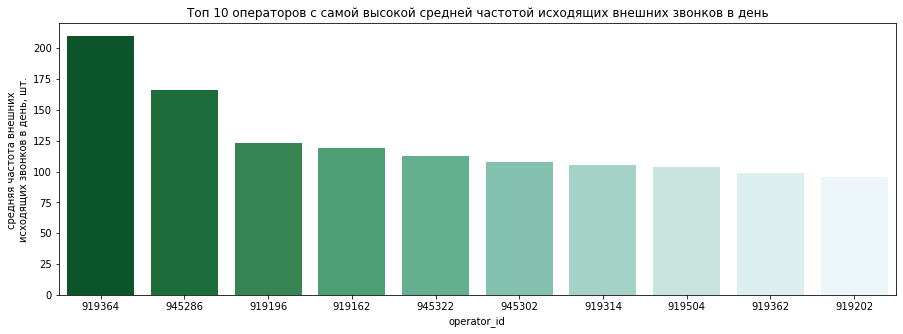

In [119]:
plt.figure(figsize=(15,5))
sns.barplot(data=list_ish_graf, y='исходящих_внешних_средн_в_день', 
            x="operator_id", 
            palette=sns.color_palette("BuGn_r", n_colors=len(list_ish_graf)),
           order=list_ish_graf.groupby('operator_id')['исходящих_внешних_средн_в_день'].agg('mean').sort_values(ascending=False).index)
plt.title('Топ 10 операторов с самой высокой средней частотой исходящих внешних звонков в день')
plt.xlabel('operator_id')
plt.ylabel('средняя частота внешних \nисходящих звонков в день, шт.')
plt.show()

<a id='5-2-2'></a>

<font color='crimson'>

#### по продолжительности звонка
</font>


In [120]:
# Найдем среднее время длительности одного звонка для каждого опеартора
ineff_out_dur_resp  = wait_call.groupby('operator_id').mean()

In [121]:
print(f'    out_lower_call - нижняя граница по средней длительности общения исходящего внешнего звонка = {round(out_lower_call,0)} секунд')

# Отсортируем их по нижней границе эффективности
ineff_out_lower_call = ineff_out_dur_resp.query('avg_callt < @out_lower_call').reset_index() 
ineff_out_lower_call = ineff_out_lower_call[['user_id', 'operator_id', 'avg_callt']]
ineff_out_lower_call = ineff_out_lower_call.sort_values(by='avg_callt', ascending=False).head(10)
ineff_out_lower_call

    out_lower_call - нижняя граница по средней длительности общения исходящего внешнего звонка = 11 секунд


,user_id,operator_id,avg_callt
47,167995.0,941838,10.266667
54,168018.0,945902,10.259485
70,168225.0,970240,10.000000
55,168018.0,945904,9.918788
15,167436.0,914266,9.750000
50,168361.0,945294,9.406656
11,167188.0,908300,9.250000
34,168187.0,937720,9.000000
20,167626.0,919302,8.747666
29,168064.0,934476,8.666667


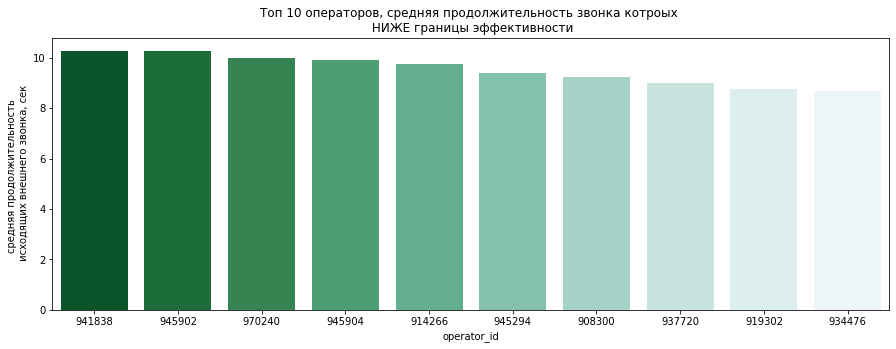

In [122]:
plt.figure(figsize=(15,5))
sns.barplot(data=ineff_out_lower_call, y='avg_callt', 
            x="operator_id", 
            palette=sns.color_palette("BuGn_r", n_colors=len(ineff_out_lower_call)),
           order=ineff_out_lower_call.groupby('operator_id')['avg_callt'].agg('mean').sort_values(ascending=False).index)
plt.title('Топ 10 операторов, средняя продолжительность звонка котроых \n НИЖЕ границы эффективности')
plt.xlabel('operator_id')
plt.ylabel('средняя продолжительность \n исходящих внешнего звонка, сек')
plt.show()

In [123]:
print(f'    out_upper_call - верхняя граница по средней длительности общения исходящего внешнего звонка = {round(out_upper_call,0)} секунд')
# Отсортируем их по верхней границе эффективности
ineff_out_upper_call = ineff_out_dur_resp.query('avg_callt > @out_upper_call').reset_index() 
ineff_out_upper_call = ineff_out_upper_call[['user_id', 'operator_id', 'avg_callt']]
ineff_out_upper_call 

    out_upper_call - верхняя граница по средней длительности общения исходящего внешнего звонка = 591 секунд


,user_id,operator_id,avg_callt
0,166520.0,891192,1306.0
1,166884.0,917890,647.0


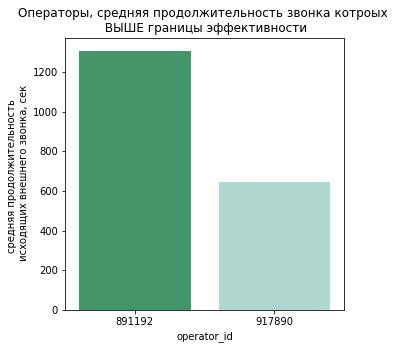

In [124]:
plt.figure(figsize=(5,5))
sns.barplot(data=ineff_out_upper_call, y='avg_callt', 
            x="operator_id", 
            palette=sns.color_palette("BuGn_r", n_colors=len(ineff_out_upper_call)),
           order=ineff_out_upper_call.groupby('operator_id')['avg_callt'].agg('mean').sort_values(ascending=False).index)
plt.title('Операторы, средняя продолжительность звонка котроых \n ВЫШЕ границы эффективности')
plt.xlabel('operator_id')
plt.ylabel('средняя продолжительность \n исходящих внешнего звонка, сек')
plt.show()

<a id='6'></a>

<font color='crimson'>
<h2 align="center"> Проверим гипотезы</h2>
    
</font>

<a id='6-1'></a>

<font color='crimson'>

### Эффективность работы оперторов в выходные дни и в будни отличается

</font>

[К началу раздела](#6)<br>
[К соддержанию](#0)

Эффективность работы оперторов будем оценивать по количеству внешних не пропущенных звонков (исходящих/входящих не важно). Главное, что это - внешние звонки, т.е. связаные с работой с клиентами, а не внутренние - связанные с решением внутренних вопросов. Так как звонков в принципе больше в будние дни чем в выходные, мы будем руководтсвовоаться относительными значениями - будем смтреть количество только внешних непропущенных звонков относительно всех звонков.

При проверке статистических гипотез будем использовать t-критерий Стьюдента, так как количество наблюдений достаточно много и в таком случае уже не важно будет ли распрделение нормальным. Так же в наших выборках есть совпадающие значения. 

**Сформулируем гипотезы:** 

**H_0**: Относительное количество внешних (internal==False) непропущенных(is_missed_call==False) звонков (calls_count) в **будние** дни<br> ***равно*** <br>относительному количеству внешних (internal==False) <br>непропущенных(is_missed_call==False) <br>звонков (calls_count) в **выходные** дни.<br>
**H_1**: Относительное количество внешних (internal==False) непропущенных(is_missed_call==False) звонков (calls_count) в **будние** дни <br>***отличается*** от<br> относительного количества внешних (internal==False)непропущенных(is_missed_call==False) звонков (calls_count) в **выходные** дни.

Значение уровня значимости зададим
`alpha` = 0.05


Для начала создадим вспомогательный столбец "дни недели":

In [125]:
df2['weekday'] = df2['date'].dt.day_name()
df2['weekday'].unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

Сделаем выборки:

In [126]:
weekdays = df2.query('weekday != "Sunday" and  weekday != "Saturday" and internal==False and is_missed_call==False')['calls_count']
weekdays_total = df2.query('weekday != "Sunday" and  weekday != "Saturday"')['calls_count']

In [127]:
weekend = df2.query('weekday == "Sunday" or  weekday == "Saturday" and internal==False and is_missed_call==False')['calls_count']
weekend_total = df2.query('weekday == "Sunday" or  weekday == "Saturday"')['calls_count']

In [128]:
# Процент пропущенных в будние дни
perc_weekdays = (weekdays/weekdays_total).fillna(0)
print(perc_weekdays.head(), len(perc_weekdays))
# Процент пропущенных в выходные дни
perc_weekend = (weekend/weekend_total).fillna(0)
print(perc_weekend.head(), len(perc_weekend))

0    0.0
1    0.0
2    0.0
3    0.0
4    1.0
Name: calls_count, dtype: float64 37053
555    1.0
556    0.0
557    1.0
558    1.0
559    0.0
Name: calls_count, dtype: float64 3805


In [129]:
# Зададим значение уровня значимости alpha
alpha = 0.05

# Вызовем метод для проверки гипотезы
results = scipy.stats.ttest_ind(perc_weekdays, perc_weekend, equal_var=False)

# вывод значения p-value на экран
print('p-значение =', results.pvalue)

if (results.pvalue < alpha):
     print(
        'p-значение меньше уровня значимости, значит \n'+ 
        'нулевую гипотезу о том, что относительное количество внешних звонков операторами \n'+
        'в будни и в выходные дни одинаковое - отвергаем')
else:
    print('p-значение больше уровня значимости, значит \n'+ 
        'нулевую гипотезу о том, что относительное количество внешних звонков операторами \n'+
        'в будни и в выходные дни одинаковое - отвергнуть не получится')


p-значение = 3.596162512664742e-187
p-значение меньше уровня значимости, значит 
нулевую гипотезу о том, что относительное количество внешних звонков операторами 
в будни и в выходные дни одинаковое - отвергаем


<a id='6-2'></a>

<font color='crimson'>

### В выходные дни и в будни относительное количество пропущенных звонков одинаковое

</font>

[К началу раздела](#6)<br>
[К соддержанию](#0)

Пропущенные звонки будем считать относительно всех звонков в этот день.
Будем как внешние тик и внутренние пропущенные.

При проверке статистических гипотез так же будем использовать t-критерий Стьюдента, так как количество наблюдений достаточно много и в таком случае уже не важно будет ли распрделение нормальным. Так же в наших выборках есть совпадающие значения. 

**Сформулируем гипотезы:** 

**H_0**: Относительное количество пропущенных(is_missed_call==True) звонков (calls_count) в **будние** дни<br> ***равно*** <br>относительному количеству пропущенных(is_missed_call==True) звонков (calls_count) в **выходные** дни.<br>
<br>
**H_1**: Относительное количество пропущенных(is_missed_call==True) звонков (calls_count) в **будние** дни <br>***отличается*** от<br> относительного количества пропущенных(is_missed_call==True) звонков (calls_count) в **выходные** дни.

Значение уровня значимости зададим
`alpha` = 0.05


In [130]:
# Найдем количество пропущенных в будние дни
perc_weekdays_delimoe = df2.query('weekday != "Sunday" and  weekday != "Saturday" and is_missed_call==True')['calls_count']

In [131]:
# Найдем количество пропущенных в выходные дни
perc_weekend_delimoe = df2.query('weekday == "Sunday" or  weekday == "Saturday" and is_missed_call==True')['calls_count']

In [132]:
# Процент пропущенных в будние дни
perc_weekdays = (perc_weekdays_delimoe/weekdays_total).fillna(0)
print(perc_weekdays.head(), len(perc_weekdays))
# Процент пропущенных в выходные дни
perc_weekend = (perc_weekend_delimoe/weekend_total).fillna(0)
print(perc_weekend.head(), len(perc_weekend))

0    1.0
1    1.0
2    0.0
3    1.0
4    0.0
Name: calls_count, dtype: float64 37053
555    0.0
556    1.0
557    0.0
558    0.0
559    1.0
Name: calls_count, dtype: float64 3805


In [133]:
perc_weekend.unique()

array([0., 1.])

In [134]:
alpha = 0.05
results = scipy.stats.ttest_ind(perc_weekdays, perc_weekend, equal_var=False)

print('p-значение =', results.pvalue)

if (results.pvalue < alpha):
    print(
        'p-значение меньше уровня значимости, значит \n'+ 
        'нулевую гипотезу о том, что относительное количество пропущенных звонков операторами \n'+
        'в будни и в выходные дни одинаковое - отвергаем')
else:
    print('p-значение больше уровня значимости, значит \n'+ 
        'нулевую гипотезу о том, что относительное количество пропущенных звонков операторами \n'+
        'в будни и в выходные дни одинаковое - отвергнуть не получится')

p-значение = 2.5370611257794904e-208
p-значение меньше уровня значимости, значит 
нулевую гипотезу о том, что относительное количество пропущенных звонков операторами 
в будни и в выходные дни одинаковое - отвергаем


<div style="border-radius: 22px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 16px">

**Выводы:**
    
Мы проверили две гипотезы статистичесчким методом.

<a id='7'></a>

<font color='crimson'>
<h2 align="center"> Выводы</h2>
    
</font>

В данном проекте
* Мы выполнили предобработку:
    * Объединили оба датафрейма, для удобства анализа тарифов и опыта операторов,
    * Удалили дубликаты, так как данные агрегированные и дублей по агрегационным признакам быть не должно,
    * Обработали пропуски в следующих столбцах:
        * `operator_id` - выяснили, что пропуски могли возникнуть из-за того, что программа в некоторых случаях не успела назначить оператора для ответа, либо звонок был в нерабочее время, либо отвечат автоответчик,
        * `internal` - природу возникновения пропусков выяснить не удалось - пропуски удалили,
    * Обнаружили несоответствие данных в столбце `is_missed_call`, которое привели в порядок,
    * Преобразовали типы данных,
    * Убрали выбросы,
    * Проверили на аномалии категориальные столбцы,
    * Проверили корреляцию,
    * Создали несколько вспомогательных столбцов, необходимых для анализа.
* Выполнили исследовательский анализ, где
    * Разделили колл-центры по специализации на те, которые специализируются на обработке входящих звонков и те, которые специализируются на обзвонах,
    * Проверили связь специализации колл-центров с тарифными планами - связь не обнаружили.
    * Оперделили границы эфеективности по различным признакам, отдельно дл колл-центров разной специализации:

In [135]:
print('Сводные данные по границам эффективности:')
print(' для колл-центров, которые специализируются на обработке входящих звонков:')
print(f'    eff_missed_call - граница по количеству пропущенных внешних входящих в месяц = {round(eff_missed_call,0)} шт.')
print(f'    eff_wait_time - граница по среднему времени ожидания = {round(eff_wait_time,0)} секунд')
print(f'    lower_eff_resp - нижняя граница по среднему времени ответа = {round(lower_eff_resp,0)} секунд')
print(f'    upper_eff_resp - верхняя граница по среднему времени ответа = {round(upper_eff_resp,0)} секунд')
print(' для колл-центров, которые специализируются на обзвонах:')
print(f'    out_lower_eff - нижняя граница по количеству исходящих внешних звонков = {round(out_lower_eff,0)} шт.')
print(f'    out_upper_eff - верхняя граница по количеству исходящих внешних звонков = {round(out_upper_eff,0)} шт.')
print(f'    out_lower_call - нижняя граница по средней длительности общения исходящего внешнего звонка = {round(out_lower_call,0)} секунд')
print(f'    out_upper_call - верхняя граница по средней длительности общения исходящего внешнего звонка = {round(out_upper_call,0)} секунд')


Сводные данные по границам эффективности:
 для колл-центров, которые специализируются на обработке входящих звонков:
    eff_missed_call - граница по количеству пропущенных внешних входящих в месяц = 5 шт.
    eff_wait_time - граница по среднему времени ожидания = 39 секунд
    lower_eff_resp - нижняя граница по среднему времени ответа = 4 секунд
    upper_eff_resp - верхняя граница по среднему времени ответа = 567 секунд
 для колл-центров, которые специализируются на обзвонах:
    out_lower_eff - нижняя граница по количеству исходящих внешних звонков = 1 шт.
    out_upper_eff - верхняя граница по количеству исходящих внешних звонков = 2291 шт.
    out_lower_call - нижняя граница по средней длительности общения исходящего внешнего звонка = 11 секунд
    out_upper_call - верхняя граница по средней длительности общения исходящего внешнего звонка = 591 секунд


Далее мы нашли операторов по определенным выше границам эффективности, для соответсвующих колл-центров, которых оказалось не много.

После проверили статистические гипотезы:
* Отвергли гипотезу о том, что относительное количество внешних звонков операторами в будни и в выходные дни одинаковое,
* Отвергли гипотезу о том, что относительное количество пропущенных звонков операторами в будни и в выходные дни одинаковое.

**По разработаке методики, по которой можно будет определять неэффективных операторов автоматически, предлагаю определять неэффективных операторов отдельно исходя из специализации колл-центров и по каждому признаку отдельно.**

Благодарю за внимание!<br>
[В начало](#nachalo)

Сохранение нужного файла для дашборда

In [136]:
df2.to_csv('Telecom_final_base.csv')